In [1]:
import pandas as pd

# Carga de datasets
df_base_clientes = pd.read_csv('../../../dataset/base_clientes.csv', sep=',')
df_base_consumos = pd.read_csv('../../../dataset/base_consumos.csv', sep=',')
df_base_saldos_creditos = pd.read_csv('../../../dataset/base_saldos_creditos.csv', sep=',')
df_base_saldos_cuentas = pd.read_csv('../../../dataset/base_saldos_cuentas.csv', sep=',')
df_universo = pd.read_csv('../../../dataset/universo.csv', sep=',')

# Verificación rápida
print("Datasets cargados correctamente:")
print(f"base_clientes → {df_base_clientes.shape}")
print(f"base_consumos → {df_base_consumos.shape}")
print(f"base_saldos_creditos → {df_base_saldos_creditos.shape}")
print(f"base_saldos_cuentas → {df_base_saldos_cuentas.shape}")
print(f"universo → {df_universo.shape}")


Datasets cargados correctamente:
base_clientes → (809579, 14)
base_consumos → (3697738, 7)
base_saldos_creditos → (11597785, 8)
base_saldos_cuentas → (8876560, 5)
universo → (535943, 3)


Primero vamos a tomar la base_clientes

In [2]:
print("hello")

hello


## base_clientes

In [3]:
df_base_clientes.head()

,ID,edad,ingreso,anios_exp,tipo_empleo,buro_de_credito,pago_nomina,tc,prest_per,prest_veh_hip,cuenta_ahorro,ofer_prest_per,ofer_tc,ofer_compra_deuda
0,42af3bf64c2c14307361e970e76c9653df78b215838971...,4.2484,4.1259,0.0,type_2,category_4,4.8095,Yes,No,No,Yes,No,No,No
1,5ab9acd6dc30e0e9361ca53e797b40f68841bd698d0926...,4.6903,3.9570,0.0,type_7,category_9,0.0000,No,No,No,Yes,No,No,No
2,8e40f988dd93417a0a40c32e65386425d891c879fedf4c...,4.1682,4.4640,0.0,type_7,category_5,0.0000,No,No,No,Yes,No,No,No
3,0e48974ce6e81d9e81a8da780521a2f98fb2385dc879df...,3.9651,4.0966,0.0,type_7,category_3,0.0000,Yes,Yes,Yes,Yes,No,No,No
4,e033c53b4fb230de5da6868503a9e079b289e064d62de4...,3.9576,4.1876,0.0,type_7,category_5,0.0000,Yes,No,No,Yes,No,No,No


In [4]:
df_base_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809579 entries, 0 to 809578
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ID                 809579 non-null  object 
 1   edad               809579 non-null  float64
 2   ingreso            809579 non-null  float64
 3   anios_exp          809579 non-null  float64
 4   tipo_empleo        809579 non-null  object 
 5   buro_de_credito    809579 non-null  object 
 6   pago_nomina        809579 non-null  float64
 7   tc                 809579 non-null  object 
 8   prest_per          809579 non-null  object 
 9   prest_veh_hip      809579 non-null  object 
 10  cuenta_ahorro      809579 non-null  object 
 11  ofer_prest_per     809579 non-null  object 
 12  ofer_tc            809579 non-null  object 
 13  ofer_compra_deuda  809579 non-null  object 
dtypes: float64(4), object(10)
memory usage: 86.5+ MB


In [5]:
df_base_clientes.describe()

,edad,ingreso,anios_exp,pago_nomina
count,809579.000000,809579.000000,809579.000000,809579.000000
mean,4.275201,4.284237,1.333632,1.417533
std,0.377544,0.477204,1.946502,2.017392
min,0.000000,0.000000,0.000000,0.000000
25%,4.001100,4.098200,0.000000,0.000000
50%,4.266700,4.286900,0.000000,0.000000
75%,4.549500,4.509800,3.619300,3.973700
max,5.000000,5.000000,5.000000,5.000000


In [6]:
df_base_clientes.duplicated().sum() 

np.int64(0)

Creación de nuevas variables derivadas [der_var1_var2]

## Creación de variables para df_base_clientes

In [7]:
df_base_clientes['der_ingreso_por_anio_exp'] = df_base_clientes['ingreso'] / (df_base_clientes['anios_exp'] + 1)
df_base_clientes['der_edad_laboral_relativa'] = df_base_clientes['anios_exp'] / (df_base_clientes['edad'] + 1)
df_base_clientes['der_edad_ingreso_relativa'] = df_base_clientes['ingreso'] / (df_base_clientes['edad'] + 1)
df_base_clientes['der_edad_anios_exp'] = df_base_clientes['edad'] / (df_base_clientes['anios_exp'] + 1)
df_base_clientes['der_ingreso_edad_exp'] = df_base_clientes['ingreso'] / ((df_base_clientes['edad'] + 1) * (df_base_clientes['anios_exp'] + 1))


In [8]:
df_base_clientes['der_ingreso_vs_nomina'] = df_base_clientes['pago_nomina'] / (df_base_clientes['ingreso'] + 1)
df_base_clientes['der_nomina_vs_exp'] = df_base_clientes['pago_nomina'] / (df_base_clientes['anios_exp'] + 1)
df_base_clientes['der_ingreso_nomina_ratio'] = (df_base_clientes['ingreso'] - df_base_clientes['pago_nomina']) / (df_base_clientes['ingreso'] + 1)


In [9]:
df_base_clientes['num_productos'] = (
    (df_base_clientes['tc'] == 'Yes').astype(int) +
    (df_base_clientes['prest_per'] == 'Yes').astype(int) +
    (df_base_clientes['prest_veh_hip'] == 'Yes').astype(int) +
    (df_base_clientes['cuenta_ahorro'] == 'Yes').astype(int)
)

df_base_clientes['num_ofertas'] = (
    (df_base_clientes['ofer_prest_per'] == 'Yes').astype(int) +
    (df_base_clientes['ofer_tc'] == 'Yes').astype(int) +
    (df_base_clientes['ofer_compra_deuda'] == 'Yes').astype(int)
)

df_base_clientes['relacion_ofertas_uso'] = df_base_clientes['num_productos'] / (df_base_clientes['num_ofertas'] + 1)


In [10]:
df_base_clientes['usa_tc_y_ahorro'] = ((df_base_clientes['tc'] == 'Yes') & (df_base_clientes['cuenta_ahorro'] == 'Yes')).astype(int)
df_base_clientes['usa_prestamo_y_tc'] = ((df_base_clientes['prest_per'] == 'Yes') & (df_base_clientes['tc'] == 'Yes')).astype(int)
df_base_clientes['tiene_creditos_multiples'] = ((df_base_clientes['prest_per'] == 'Yes') & (df_base_clientes['prest_veh_hip'] == 'Yes')).astype(int)


In [11]:
df_base_clientes['oferta_credito_activo'] = ((df_base_clientes['ofer_prest_per'] == 'Yes') | (df_base_clientes['ofer_tc'] == 'Yes')).astype(int)
df_base_clientes['oferta_total_vs_uso'] = df_base_clientes['num_ofertas'] / (df_base_clientes['num_productos'] + 1)


In [12]:
df_base_clientes['riesgo_credito_grupo'] = df_base_clientes['buro_de_credito'].map({'category_1': 1, 'category_2': 2, 'category_3': 3, 'category_4': 4, 'category_5': 5, 'category_6': 6, 'category_7': 7, 'category_8': 8, 'category_9': 9})


Creación de variables agregadas

In [13]:
# import numpy as np quitar comentario
# import pandas as pd

# # Identificar columnas numéricas
# numeric_cols = df_base_clientes.select_dtypes(include=[np.number]).columns

# # Crear transformaciones directamente en el mismo DataFrame
# for col in numeric_cols:
#     df_base_clientes[f'{col}_cuadrado'] = df_base_clientes[col] ** 2
#     df_base_clientes[f'{col}_log'] = np.where(df_base_clientes[col] > 0, np.log(df_base_clientes[col]), np.nan)
#     df_base_clientes[f'{col}_inv'] = np.where(df_base_clientes[col] != 0, 1 / df_base_clientes[col], np.nan)

# # Mostrar confirmación
# print("Transformaciones creadas en df_base_clientes:")
# print([c for c in df_base_clientes.columns if any(suf in c for suf in ['_cuadrado', '_log', '_inv'])])


Concatenar tablas

In [14]:
import pandas as pd

# Asegúrate de tener una columna común para hacer el join, por ejemplo 'ID'
# (ajusta 'ID' si el nombre de la llave es diferente)

# 1️⃣ Renombrar las columnas de df_base_clientes (excepto la llave)
df_base_clientes_prefixed = df_base_clientes.rename(
    columns={col: f"DB_CLI_{col}" for col in df_base_clientes.columns if col != 'ID'}
)

# 2️⃣ Realizar el LEFT JOIN con df_universo
df_universo = df_universo.merge(
    df_base_clientes_prefixed,
    on='ID',
    how='left'
)

# 3️⃣ Verificación
print(df_universo.shape)
df_universo.head()


(535943, 33)


,ID,target,periodo,DB_CLI_edad,DB_CLI_ingreso,DB_CLI_anios_exp,DB_CLI_tipo_empleo,DB_CLI_buro_de_credito,DB_CLI_pago_nomina,DB_CLI_tc,...,DB_CLI_der_ingreso_nomina_ratio,DB_CLI_num_productos,DB_CLI_num_ofertas,DB_CLI_relacion_ofertas_uso,DB_CLI_usa_tc_y_ahorro,DB_CLI_usa_prestamo_y_tc,DB_CLI_tiene_creditos_multiples,DB_CLI_oferta_credito_activo,DB_CLI_oferta_total_vs_uso,DB_CLI_riesgo_credito_grupo
0,4d5a33701cb5b30b0b0a924d80de4ae78fbd0b54e2117f...,0,period_5,3.8498,4.6527,0.000,type_2,category_6,0.0,No,...,0.823093,1,0,1.000000,0,0,0,0,0.0,6
1,bf7092e5f394d266143dfe90b3fc73eac51f0b0084d7a3...,0,period_5,4.5476,4.2447,4.274,type_3,category_4,0.0,No,...,0.809331,1,0,1.000000,0,0,0,0,0.0,4
2,270d8f8f607d19886c50edb7746c3670194134b56d31e2...,0,period_5,4.3600,4.2117,0.000,type_2,category_9,0.0,No,...,0.808124,1,0,1.000000,0,0,0,0,0.0,9
3,5e6b7bea5e4911329669f45728d3398ad54dfe11fbb16d...,0,period_5,4.3914,4.1584,0.000,type_7,category_2,0.0,No,...,0.806141,1,2,0.333333,0,0,0,1,1.0,2
4,98954adf775b9fce1c9e311a025ec3e0a1c6e90f991ef7...,0,period_5,4.3077,4.3285,0.000,type_2,category_6,0.0,No,...,0.812330,1,0,1.000000,0,0,0,0,0.0,6


In [15]:
df_universo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535943 entries, 0 to 535942
Data columns (total 33 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   ID                                535943 non-null  object 
 1   target                            535943 non-null  int64  
 2   periodo                           535943 non-null  object 
 3   DB_CLI_edad                       535943 non-null  float64
 4   DB_CLI_ingreso                    535943 non-null  float64
 5   DB_CLI_anios_exp                  535943 non-null  float64
 6   DB_CLI_tipo_empleo                535943 non-null  object 
 7   DB_CLI_buro_de_credito            535943 non-null  object 
 8   DB_CLI_pago_nomina                535943 non-null  float64
 9   DB_CLI_tc                         535943 non-null  object 
 10  DB_CLI_prest_per                  535943 non-null  object 
 11  DB_CLI_prest_veh_hip              535943 non-null  o

---

## df_base_saldos_cuentas

In [16]:
df_base_saldos_cuentas.head()

,mes,ID,saldo_ahorros,saldo_otros,periodo
0,11,c7a6cecac361a970ee6c7cb9f2679c38c668940c6ebdc5...,4.1900,0.0,period_5
1,12,68f89dc7efe7cd1ce3cf6d52d8867bd2b84f236736bf91...,4.4621,0.0,period_5
2,2,e3f6afb18792d0b97cb9a63ad9567bbd106146c78d212a...,4.2878,0.0,period_5
3,1,8993170400939d522bdc72707527f5ab90202119fe3cab...,5.0000,5.0,period_5
4,7,399d686897232a55c713d61a6bdc7e232ab85b864d6288...,3.8922,0.0,period_5


In [17]:
df_base_saldos_cuentas.head()

,mes,ID,saldo_ahorros,saldo_otros,periodo
0,11,c7a6cecac361a970ee6c7cb9f2679c38c668940c6ebdc5...,4.1900,0.0,period_5
1,12,68f89dc7efe7cd1ce3cf6d52d8867bd2b84f236736bf91...,4.4621,0.0,period_5
2,2,e3f6afb18792d0b97cb9a63ad9567bbd106146c78d212a...,4.2878,0.0,period_5
3,1,8993170400939d522bdc72707527f5ab90202119fe3cab...,5.0000,5.0,period_5
4,7,399d686897232a55c713d61a6bdc7e232ab85b864d6288...,3.8922,0.0,period_5


In [18]:
df_base_saldos_cuentas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8876560 entries, 0 to 8876559
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   mes            int64  
 1   ID             object 
 2   saldo_ahorros  float64
 3   saldo_otros    float64
 4   periodo        object 
dtypes: float64(2), int64(1), object(2)
memory usage: 338.6+ MB


In [19]:
df_base_saldos_cuentas.describe()

,mes,saldo_ahorros,saldo_otros
count,8.876560e+06,8.876560e+06,8.876560e+06
mean,6.632422e+00,3.140673e+00,6.191672e-01
std,3.448429e+00,1.207045e+00,1.405347e+00
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,2.644100e+00,0.000000e+00
50%,7.000000e+00,3.318500e+00,0.000000e+00
75%,1.000000e+01,3.986700e+00,0.000000e+00
max,1.200000e+01,5.000000e+00,5.000000e+00


Creación de nuevas variables derivadas [der_var1_var2]

Creación de variables agregadas

In [20]:
import pandas as pd
from functools import reduce

# -------------------------------------------------------------
# ORDEN Y CONFIGURACIÓN BASE
# -------------------------------------------------------------
df_base_saldos_cuentas = df_base_saldos_cuentas.sort_values(by=['ID', 'mes'], ascending=[True, False])

# Detectar el mes máximo disponible (por si no es diciembre)
mes_max = df_base_saldos_cuentas['mes'].max()

# -------------------------------------------------------------
# FUNCIÓN PARA AGREGAR LOS ÚLTIMOS n MESES
# -------------------------------------------------------------
def agregar_por_meses(df, n, mes_max):
    """
    Calcula agregados de saldo de ahorros (max, min, sum, mean)
    para los últimos n meses de cada cliente.
    """
    meses = list(range(mes_max, mes_max - n, -1))  # Ejemplo: si mes_max=12, n=3 → [12,11,10]
    sufijo = f"{n}_meses"
    
    return (
        df[df['mes'].isin(meses)]
        .groupby('ID', as_index=False)
        .agg(
            **{
                f"{sufijo}_max_saldo_ahorros": ('saldo_ahorros', 'max'),
                f"{sufijo}_min_saldo_ahorros": ('saldo_ahorros', 'min'),
                f"{sufijo}_sum_saldo_ahorros": ('saldo_ahorros', 'sum'),
                f"{sufijo}_prom_saldo_ahorros": ('saldo_ahorros', 'mean'),
            }
        )
    )

# -------------------------------------------------------------
# GENERACIÓN AUTOMÁTICA DE AGREGADOS (2 A 12 MESES)
# -------------------------------------------------------------
agregados_list = [
    agregar_por_meses(df_base_saldos_cuentas, n, mes_max)
    for n in range(2, 13)
]

# -------------------------------------------------------------
# UNIÓN FINAL DE TODOS LOS AGREGADOS POR ID
# -------------------------------------------------------------
df_agregados_base_saldos_cuentas = reduce(
    lambda left, right: pd.merge(left, right, on='ID', how='left'),
    agregados_list
)

# -------------------------------------------------------------
# REVISIÓN FINAL
# -------------------------------------------------------------
print(f"Shape final: {df_agregados_base_saldos_cuentas.shape}")
df_agregados_base_saldos_cuentas.head()


Shape final: (784556, 45)


,ID,2_meses_max_saldo_ahorros,2_meses_min_saldo_ahorros,2_meses_sum_saldo_ahorros,2_meses_prom_saldo_ahorros,3_meses_max_saldo_ahorros,3_meses_min_saldo_ahorros,3_meses_sum_saldo_ahorros,3_meses_prom_saldo_ahorros,4_meses_max_saldo_ahorros,...,10_meses_sum_saldo_ahorros,10_meses_prom_saldo_ahorros,11_meses_max_saldo_ahorros,11_meses_min_saldo_ahorros,11_meses_sum_saldo_ahorros,11_meses_prom_saldo_ahorros,12_meses_max_saldo_ahorros,12_meses_min_saldo_ahorros,12_meses_sum_saldo_ahorros,12_meses_prom_saldo_ahorros
0,00000f6dd2df6f081ce59cc4490f152e3fd5695de62bd9...,2.0478,1.9315,3.9793,1.98965,3.2484,1.9315,7.2277,2.409233,3.4815,...,15.7029,1.57029,3.4815,0.4939,16.2953,1.481391,3.4815,0.4939,16.8877,1.407308
1,000043cc1abd7597c99f494cc523ff99a4e0e64e98b128...,3.5701,2.7086,6.2787,3.13935,3.5701,2.7086,9.1865,3.062167,3.5701,...,33.4863,3.34863,3.9980,2.6010,36.0873,3.280664,3.9980,2.3428,38.4301,3.202508
2,000095b7b77ff622b2130f2d4bfa1e8d81f1fc4580a248...,3.9865,3.9865,7.9730,3.98650,3.9865,3.9865,11.9595,3.986500,3.9865,...,39.8650,3.98650,3.9865,3.9865,43.8515,3.986500,3.9865,3.9865,47.8380,3.986500
3,00009bb00e84af44d1abc86b9fbd155842ffef6cad814d...,4.0610,4.0464,8.1074,4.05370,4.0791,4.0464,12.1865,4.062167,4.0946,...,42.1374,4.21374,4.3968,4.0464,46.4952,4.226836,4.3968,4.0464,50.7124,4.226033
4,0000a9728fc57abef25c2fc0424c9c907a5559e7b8b559...,3.9150,2.8720,6.7870,3.39350,3.9150,2.8720,9.6760,3.225333,3.9150,...,27.7544,2.77544,3.9150,2.0286,30.7387,2.794427,3.9150,2.0286,33.7255,2.810458


Captura el nivel de estabilidad financiera del cliente. Clientes con alta variabilidad suelen ser más propensos a salir.

In [21]:
# -------------------------------------------------------------
# CREAR NUEVOS AGREGADOS ROLLING
# -------------------------------------------------------------
df_agregados_roll = df_base_saldos_cuentas.groupby('ID', as_index=False).agg(
    std_3m_ahorros=('saldo_ahorros', lambda x: x.rolling(3, min_periods=1).std().iloc[-1]),
    cv_3m_ahorros=('saldo_ahorros', lambda x: (x.rolling(3, min_periods=1).std() / (x.rolling(3, min_periods=1).mean() + 1e-6)).iloc[-1])
)

# -------------------------------------------------------------
# UNIÓN CON LOS AGREGADOS ANTERIORES
# -------------------------------------------------------------
df_agregados_base_saldos_cuentas = pd.merge(
    df_agregados_base_saldos_cuentas,
    df_agregados_roll,
    on='ID',
    how='left'
)

# -------------------------------------------------------------
# REVISIÓN FINAL
# -------------------------------------------------------------
print(f"Shape final: {df_agregados_base_saldos_cuentas.shape}")
df_agregados_base_saldos_cuentas.head()


Shape final: (784556, 47)


,ID,2_meses_max_saldo_ahorros,2_meses_min_saldo_ahorros,2_meses_sum_saldo_ahorros,2_meses_prom_saldo_ahorros,3_meses_max_saldo_ahorros,3_meses_min_saldo_ahorros,3_meses_sum_saldo_ahorros,3_meses_prom_saldo_ahorros,4_meses_max_saldo_ahorros,...,11_meses_max_saldo_ahorros,11_meses_min_saldo_ahorros,11_meses_sum_saldo_ahorros,11_meses_prom_saldo_ahorros,12_meses_max_saldo_ahorros,12_meses_min_saldo_ahorros,12_meses_sum_saldo_ahorros,12_meses_prom_saldo_ahorros,std_3m_ahorros,cv_3m_ahorros
0,00000f6dd2df6f081ce59cc4490f152e3fd5695de62bd9...,2.0478,1.9315,3.9793,1.98965,3.2484,1.9315,7.2277,2.409233,3.4815,...,3.4815,0.4939,16.2953,1.481391,3.4815,0.4939,16.8877,1.407308,0.535319,0.593831
1,000043cc1abd7597c99f494cc523ff99a4e0e64e98b128...,3.5701,2.7086,6.2787,3.13935,3.5701,2.7086,9.1865,3.062167,3.5701,...,3.9980,2.6010,36.0873,3.280664,3.9980,2.3428,38.4301,3.202508,0.700319,0.244073
2,000095b7b77ff622b2130f2d4bfa1e8d81f1fc4580a248...,3.9865,3.9865,7.9730,3.98650,3.9865,3.9865,11.9595,3.986500,3.9865,...,3.9865,3.9865,43.8515,3.986500,3.9865,3.9865,47.8380,3.986500,0.000000,0.000000
3,00009bb00e84af44d1abc86b9fbd155842ffef6cad814d...,4.0610,4.0464,8.1074,4.05370,4.0791,4.0464,12.1865,4.062167,4.0946,...,4.3968,4.0464,46.4952,4.226836,4.3968,4.0464,50.7124,4.226033,0.094468,0.021848
4,0000a9728fc57abef25c2fc0424c9c907a5559e7b8b559...,3.9150,2.8720,6.7870,3.39350,3.9150,2.8720,9.6760,3.225333,3.9150,...,3.9150,2.0286,30.7387,2.794427,3.9150,2.0286,33.7255,2.810458,0.021427,0.007207


indicadores de composición

In [22]:
df_base_saldos_cuentas['ratio_ahorros_otros'] = (
    df_base_saldos_cuentas['saldo_ahorros'] /
    (df_base_saldos_cuentas['saldo_otros'] + 1e-6)
)

df_base_saldos_cuentas['prop_ahorros_total'] = (
    df_base_saldos_cuentas['saldo_ahorros'] /
    (df_base_saldos_cuentas['saldo_ahorros'] + df_base_saldos_cuentas['saldo_otros'] + 1e-6)
)

# -------------------------------------------------------------
# FILTRAR SOLO MES 12
# -------------------------------------------------------------
df_mes12 = df_base_saldos_cuentas[df_base_saldos_cuentas['mes'] == 12]

# -------------------------------------------------------------
# CREAR NUEVOS AGREGADOS POR ID
# -------------------------------------------------------------
df_agregados_ratio = df_mes12.groupby('ID', as_index=False).agg(
    ratio_ahorros_otros=('ratio_ahorros_otros', 'first'),
    prop_ahorros_total=('prop_ahorros_total', 'first')
)

# -------------------------------------------------------------
# UNIÓN CON LOS AGREGADOS ANTERIORES
# -------------------------------------------------------------
df_agregados_base_saldos_cuentas = pd.merge(
    df_agregados_base_saldos_cuentas,
    df_agregados_ratio,
    on='ID',
    how='left'
)

# -------------------------------------------------------------
# REVISIÓN FINAL
# -------------------------------------------------------------
print(f"Shape final: {df_agregados_base_saldos_cuentas.shape}")
df_agregados_base_saldos_cuentas.head()


Shape final: (784556, 49)


,ID,2_meses_max_saldo_ahorros,2_meses_min_saldo_ahorros,2_meses_sum_saldo_ahorros,2_meses_prom_saldo_ahorros,3_meses_max_saldo_ahorros,3_meses_min_saldo_ahorros,3_meses_sum_saldo_ahorros,3_meses_prom_saldo_ahorros,4_meses_max_saldo_ahorros,...,11_meses_sum_saldo_ahorros,11_meses_prom_saldo_ahorros,12_meses_max_saldo_ahorros,12_meses_min_saldo_ahorros,12_meses_sum_saldo_ahorros,12_meses_prom_saldo_ahorros,std_3m_ahorros,cv_3m_ahorros,ratio_ahorros_otros,prop_ahorros_total
0,00000f6dd2df6f081ce59cc4490f152e3fd5695de62bd9...,2.0478,1.9315,3.9793,1.98965,3.2484,1.9315,7.2277,2.409233,3.4815,...,16.2953,1.481391,3.4815,0.4939,16.8877,1.407308,0.535319,0.593831,1.931500e+06,0.999999
1,000043cc1abd7597c99f494cc523ff99a4e0e64e98b128...,3.5701,2.7086,6.2787,3.13935,3.5701,2.7086,9.1865,3.062167,3.5701,...,36.0873,3.280664,3.9980,2.3428,38.4301,3.202508,0.700319,0.244073,3.176217e+01,0.969477
2,000095b7b77ff622b2130f2d4bfa1e8d81f1fc4580a248...,3.9865,3.9865,7.9730,3.98650,3.9865,3.9865,11.9595,3.986500,3.9865,...,43.8515,3.986500,3.9865,3.9865,47.8380,3.986500,0.000000,0.000000,3.986500e+06,1.000000
3,00009bb00e84af44d1abc86b9fbd155842ffef6cad814d...,4.0610,4.0464,8.1074,4.05370,4.0791,4.0464,12.1865,4.062167,4.0946,...,46.4952,4.226836,4.3968,4.0464,50.7124,4.226033,0.094468,0.021848,4.046400e+06,1.000000
4,0000a9728fc57abef25c2fc0424c9c907a5559e7b8b559...,3.9150,2.8720,6.7870,3.39350,3.9150,2.8720,9.6760,3.225333,3.9150,...,30.7387,2.794427,3.9150,2.0286,33.7255,2.810458,0.021427,0.007207,3.915000e+06,1.000000


In [23]:
# Mes con mayor saldo
df_mes_max = (
    df_base_saldos_cuentas.groupby('ID')['saldo_ahorros']
    .idxmax().reset_index(name='mes_max_saldo')
)

# Mes con menor saldo
df_mes_min = (
    df_base_saldos_cuentas.groupby('ID')['saldo_ahorros']
    .idxmin().reset_index(name='mes_min_saldo')
)

# Número de meses consecutivos con caída de saldo
def meses_caida(x):
    return (x.diff() < 0).astype(int).rolling(3, min_periods=1).sum().iloc[-1]

df_caida = (
    df_base_saldos_cuentas.groupby('ID')['saldo_ahorros']
    .apply(meses_caida).reset_index(name='meses_caida_consecutiva')
)

# Unión con df_mes_max
df_agregados_base_saldos_cuentas = pd.merge(
    df_agregados_base_saldos_cuentas,
    df_mes_max,
    on='ID',
    how='left'
)

# Unión con df_mes_min
df_agregados_base_saldos_cuentas = pd.merge(
    df_agregados_base_saldos_cuentas,
    df_mes_min,
    on='ID',
    how='left'
)

# Unión con df_caida
df_agregados_base_saldos_cuentas = pd.merge(
    df_agregados_base_saldos_cuentas,
    df_caida,
    on='ID',
    how='left'
)

# Revisión final
print(f"Shape final: {df_agregados_base_saldos_cuentas.shape}")
df_agregados_base_saldos_cuentas.head()


Shape final: (784556, 52)


,ID,2_meses_max_saldo_ahorros,2_meses_min_saldo_ahorros,2_meses_sum_saldo_ahorros,2_meses_prom_saldo_ahorros,3_meses_max_saldo_ahorros,3_meses_min_saldo_ahorros,3_meses_sum_saldo_ahorros,3_meses_prom_saldo_ahorros,4_meses_max_saldo_ahorros,...,12_meses_min_saldo_ahorros,12_meses_sum_saldo_ahorros,12_meses_prom_saldo_ahorros,std_3m_ahorros,cv_3m_ahorros,ratio_ahorros_otros,prop_ahorros_total,mes_max_saldo,mes_min_saldo,meses_caida_consecutiva
0,00000f6dd2df6f081ce59cc4490f152e3fd5695de62bd9...,2.0478,1.9315,3.9793,1.98965,3.2484,1.9315,7.2277,2.409233,3.4815,...,0.4939,16.8877,1.407308,0.535319,0.593831,1.931500e+06,0.999999,6574850,2043247,1.0
1,000043cc1abd7597c99f494cc523ff99a4e0e64e98b128...,3.5701,2.7086,6.2787,3.13935,3.5701,2.7086,9.1865,3.062167,3.5701,...,2.3428,38.4301,3.202508,0.700319,0.244073,3.176217e+01,0.969477,5740473,5765000,2.0
2,000095b7b77ff622b2130f2d4bfa1e8d81f1fc4580a248...,3.9865,3.9865,7.9730,3.98650,3.9865,3.9865,11.9595,3.986500,3.9865,...,3.9865,47.8380,3.986500,0.000000,0.000000,3.986500e+06,1.000000,6066155,6066155,0.0
3,00009bb00e84af44d1abc86b9fbd155842ffef6cad814d...,4.0610,4.0464,8.1074,4.05370,4.0791,4.0464,12.1865,4.062167,4.0946,...,4.0464,50.7124,4.226033,0.094468,0.021848,4.046400e+06,1.000000,3447096,1829462,2.0
4,0000a9728fc57abef25c2fc0424c9c907a5559e7b8b559...,3.9150,2.8720,6.7870,3.39350,3.9150,2.8720,9.6760,3.225333,3.9150,...,2.0286,33.7255,2.810458,0.021427,0.007207,3.915000e+06,1.000000,8062034,699660,0.0


In [24]:
# import numpy as np
# import pandas as pd

# # Identificar columnas numéricas
# numeric_cols = df_agregados_base_saldos_cuentas.select_dtypes(include=[np.number]).columns

# # Crear transformaciones directamente en el mismo DataFrame
# for col in numeric_cols:
#     df_agregados_base_saldos_cuentas[f'{col}_cuadrado'] = df_agregados_base_saldos_cuentas[col] ** 2
#     df_agregados_base_saldos_cuentas[f'{col}_log'] = np.where(df_agregados_base_saldos_cuentas[col] > 0, np.log(df_agregados_base_saldos_cuentas[col]), np.nan)
#     df_agregados_base_saldos_cuentas[f'{col}_inv'] = np.where(df_agregados_base_saldos_cuentas[col] != 0, 1 / df_agregados_base_saldos_cuentas[col], np.nan)

# # Mostrar confirmación
# print("Transformaciones creadas en df_agregados_base_saldos_cuentas:")
# print([c for c in df_agregados_base_saldos_cuentas.columns if any(suf in c for suf in ['_cuadrado', '_log', '_inv'])])


Concatenar tablas

In [25]:
# 1️⃣ Renombrar columnas de df_base_saldos_cuentas (excepto la llave 'ID')
df_base_saldos_cuentas_prefixed = df_agregados_base_saldos_cuentas.rename(
    columns={col: f"DB_SAL_CUE_{col}" for col in df_agregados_base_saldos_cuentas.columns if col != 'ID'}
)

# 2️⃣ Hacer el LEFT JOIN con df_universo
df_universo = df_universo.merge(
    df_base_saldos_cuentas_prefixed,
    on='ID',
    how='left'
)

# 3️⃣ Verificación
print(df_universo.shape)
df_universo.head()


(535943, 84)


,ID,target,periodo,DB_CLI_edad,DB_CLI_ingreso,DB_CLI_anios_exp,DB_CLI_tipo_empleo,DB_CLI_buro_de_credito,DB_CLI_pago_nomina,DB_CLI_tc,...,DB_SAL_CUE_12_meses_min_saldo_ahorros,DB_SAL_CUE_12_meses_sum_saldo_ahorros,DB_SAL_CUE_12_meses_prom_saldo_ahorros,DB_SAL_CUE_std_3m_ahorros,DB_SAL_CUE_cv_3m_ahorros,DB_SAL_CUE_ratio_ahorros_otros,DB_SAL_CUE_prop_ahorros_total,DB_SAL_CUE_mes_max_saldo,DB_SAL_CUE_mes_min_saldo,DB_SAL_CUE_meses_caida_consecutiva
0,4d5a33701cb5b30b0b0a924d80de4ae78fbd0b54e2117f...,0,period_5,3.8498,4.6527,0.000,type_2,category_6,0.0,No,...,2.5149,39.5354,3.294617,0.894806,0.252333,3175400.0,1.0,7434408.0,3272878.0,1.0
1,bf7092e5f394d266143dfe90b3fc73eac51f0b0084d7a3...,0,period_5,4.5476,4.2447,4.274,type_3,category_4,0.0,No,...,3.2254,40.5731,3.381092,0.003002,0.000844,3225400.0,1.0,316982.0,2007939.0,0.0
2,270d8f8f607d19886c50edb7746c3670194134b56d31e2...,0,period_5,4.3600,4.2117,0.000,type_2,category_9,0.0,No,...,2.7090,42.1470,3.512250,0.005519,0.001410,2753000.0,1.0,4746546.0,546634.0,2.0
3,5e6b7bea5e4911329669f45728d3398ad54dfe11fbb16d...,0,period_5,4.3914,4.1584,0.000,type_7,category_2,0.0,No,...,3.7511,46.6400,3.886667,0.025317,0.006208,3751100.0,1.0,88699.0,3426600.0,2.0
4,98954adf775b9fce1c9e311a025ec3e0a1c6e90f991ef7...,0,period_5,4.3077,4.3285,0.000,type_2,category_6,0.0,No,...,2.6043,35.3925,2.949375,0.124250,0.045243,3408600.0,1.0,1906558.0,5074763.0,2.0


In [26]:
nulos_por_columna = df_universo.isnull().sum()
nulos_por_columna

ID                                        0
target                                    0
periodo                                   0
DB_CLI_edad                               0
DB_CLI_ingreso                            0
                                      ...  
DB_SAL_CUE_ratio_ahorros_otros        17359
DB_SAL_CUE_prop_ahorros_total         17359
DB_SAL_CUE_mes_max_saldo              15564
DB_SAL_CUE_mes_min_saldo              15564
DB_SAL_CUE_meses_caida_consecutiva    15564
Length: 84, dtype: int64

___

## df_base_saldos_creditos

In [27]:
df_base_saldos_creditos.head()

,mes,ID,tipo_credito,tipo_producto,inst_fin,monto_saldo,dias_atraso,periodo
0,11,c844ef92b32ec94baaf565a3d22cfa20fd1544a0f8efab...,type_7,product_2,entity_2,3.4051,5.0,period_5
1,10,c817cb3a37a6b640304e87fafd7cd8569bfffb650a5aa3...,type_7,product_2,entity_1,3.4003,5.0,period_5
2,6,1d1f726d844c5a343cca1bbfd0c2b869559f5910772c5e...,type_7,product_2,entity_5,3.0592,5.0,period_5
3,6,7c77a3fd230db16988cb2e6ca23779c756f86895dfe254...,type_7,product_2,entity_2,2.8013,5.0,period_5
4,11,a8702fb4fbdcb735619d6fbd0a5fed46096cdaba80ea35...,type_7,product_2,entity_2,2.9850,5.0,period_5


In [28]:
df_base_saldos_creditos = df_base_saldos_creditos.merge(
    df_universo[['ID', 'target']],  # seleccionamos ID y target
    on='ID',                        # columna en común para hacer el join
    how='left'                       # tipo de join
)

df_base_saldos_creditos.head()


,mes,ID,tipo_credito,tipo_producto,inst_fin,monto_saldo,dias_atraso,periodo,target
0,11,c844ef92b32ec94baaf565a3d22cfa20fd1544a0f8efab...,type_7,product_2,entity_2,3.4051,5.0,period_5,0.0
1,10,c817cb3a37a6b640304e87fafd7cd8569bfffb650a5aa3...,type_7,product_2,entity_1,3.4003,5.0,period_5,0.0
2,6,1d1f726d844c5a343cca1bbfd0c2b869559f5910772c5e...,type_7,product_2,entity_5,3.0592,5.0,period_5,1.0
3,6,7c77a3fd230db16988cb2e6ca23779c756f86895dfe254...,type_7,product_2,entity_2,2.8013,5.0,period_5,0.0
4,11,a8702fb4fbdcb735619d6fbd0a5fed46096cdaba80ea35...,type_7,product_2,entity_2,2.9850,5.0,period_5,1.0


In [29]:
df_base_saldos_creditos.head()

,mes,ID,tipo_credito,tipo_producto,inst_fin,monto_saldo,dias_atraso,periodo,target
0,11,c844ef92b32ec94baaf565a3d22cfa20fd1544a0f8efab...,type_7,product_2,entity_2,3.4051,5.0,period_5,0.0
1,10,c817cb3a37a6b640304e87fafd7cd8569bfffb650a5aa3...,type_7,product_2,entity_1,3.4003,5.0,period_5,0.0
2,6,1d1f726d844c5a343cca1bbfd0c2b869559f5910772c5e...,type_7,product_2,entity_5,3.0592,5.0,period_5,1.0
3,6,7c77a3fd230db16988cb2e6ca23779c756f86895dfe254...,type_7,product_2,entity_2,2.8013,5.0,period_5,0.0
4,11,a8702fb4fbdcb735619d6fbd0a5fed46096cdaba80ea35...,type_7,product_2,entity_2,2.9850,5.0,period_5,1.0


In [30]:
df_base_saldos_creditos.periodo.value_counts()

periodo
period_9    1373919
period_8    1345064
period_6    1315613
period_7    1309631
period_5    1303474
period_4    1287253
period_3    1248165
period_2    1221274
period_1    1193392
Name: count, dtype: int64

No usar tipo_credito

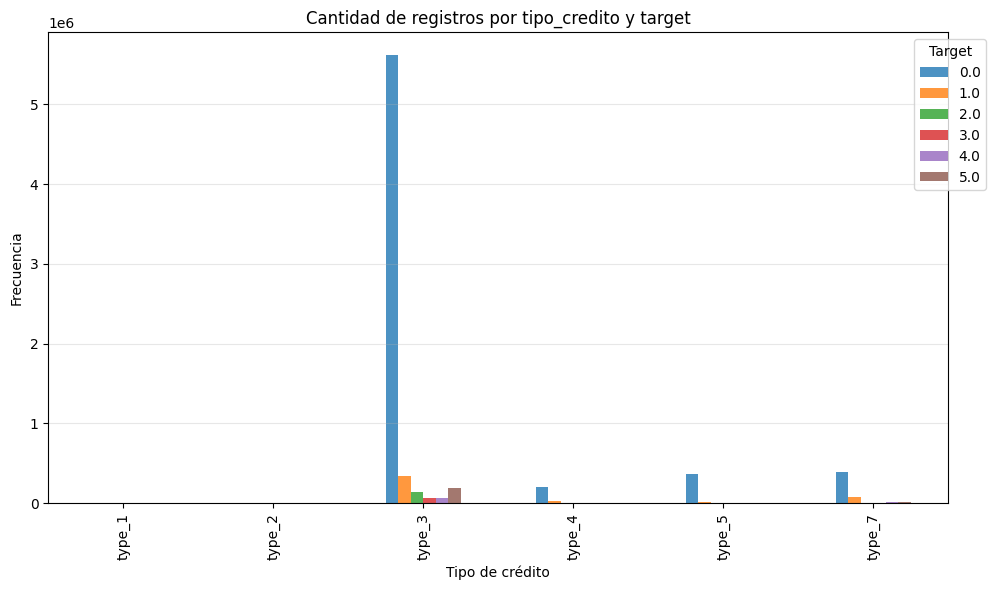

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Excluimos filas con NaN en 'target' o 'tipo_credito'
df_plot = df_base_saldos_creditos.dropna(subset=['target', 'tipo_credito'])

# Creamos una tabla de contingencia tipo_credito vs target
contingency = pd.crosstab(df_plot['tipo_credito'], df_plot['target'])

# Graficamos
contingency.plot(kind='bar', figsize=(10,6), alpha=0.8)

plt.title('Cantidad de registros por tipo_credito y target')
plt.xlabel('Tipo de crédito')
plt.ylabel('Frecuencia')
plt.legend(title='Target', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Excluimos filas con NaN en 'target', 'tipo_credito' o 'periodo'
df_plot = df_base_saldos_creditos.dropna(subset=['target', 'tipo_credito', 'periodo'])

# Obtenemos los periodos únicos
periodos = df_plot['periodo'].unique()

# # Creamos un histograma para cada periodo
# for p in periodos:
#     df_periodo = df_plot[df_plot['periodo'] == p]
    
#     # Tabla de contingencia tipo_credito vs target
#     contingency = pd.crosstab(df_periodo['tipo_credito'], df_periodo['target'])
    
#     # Graficamos
#     ax = contingency.plot(kind='bar', figsize=(10,6), alpha=0.8)
    
#     plt.title(f'Cantidad de registros por tipo_credito y target - Periodo {p}')
#     plt.xlabel('Tipo de crédito')
#     plt.ylabel('Frecuencia')
#     plt.legend(title='Target', bbox_to_anchor=(1.05, 1))
#     plt.grid(axis='y', alpha=0.3)
#     plt.tight_layout()
#     plt.show()


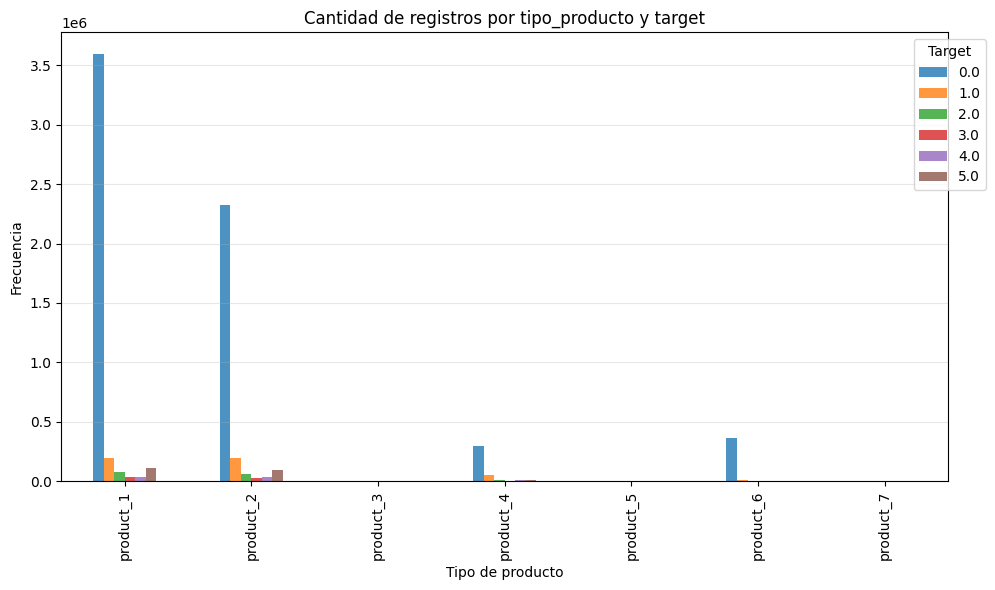

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Excluimos filas con NaN en 'target' o 'tipo_producto'
df_plot = df_base_saldos_creditos.dropna(subset=['target', 'tipo_producto'])

# Creamos una tabla de contingencia tipo_producto vs target
contingency = pd.crosstab(df_plot['tipo_producto'], df_plot['target'])

# Graficamos
contingency.plot(kind='bar', figsize=(10,6), alpha=0.8)

plt.title('Cantidad de registros por tipo_producto y target')
plt.xlabel('Tipo de producto')
plt.ylabel('Frecuencia')
plt.legend(title='Target', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Excluimos filas con NaN en 'target', 'tipo_producto' o 'periodo'
df_plot = df_base_saldos_creditos.dropna(subset=['target', 'tipo_producto', 'periodo'])

# Obtenemos los periodos únicos
periodos = df_plot['periodo'].unique()

# Creamos un histograma para cada periodo
# for p in periodos:
#     df_periodo = df_plot[df_plot['periodo'] == p]
    
#     # Tabla de contingencia tipo_producto vs target
#     contingency = pd.crosstab(df_periodo['tipo_producto'], df_periodo['target'])
    
#     # Graficamos
#     ax = contingency.plot(kind='bar', figsize=(10,6), alpha=0.8)
    
#     plt.title(f'Cantidad de registros por tipo_producto y target - Periodo {p}')
#     plt.xlabel('Tipo de producto')
#     plt.ylabel('Frecuencia')
#     plt.legend(title='Target', bbox_to_anchor=(1.05, 1))
#     plt.grid(axis='y', alpha=0.3)
#     plt.tight_layout()
#     plt.show()


No usar inst_fin

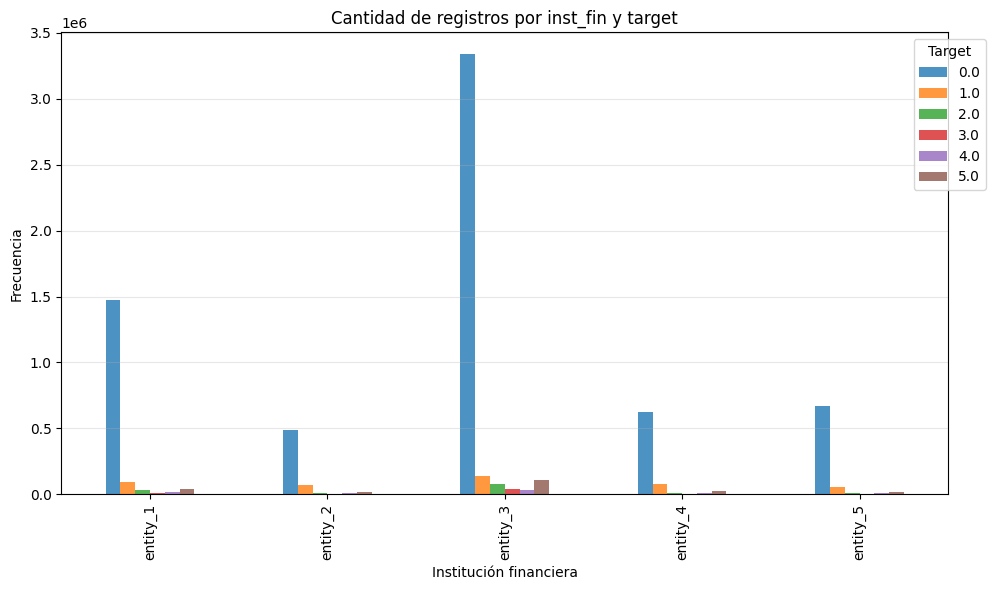

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Excluimos filas con NaN en 'target' o 'inst_fin'
df_plot = df_base_saldos_creditos.dropna(subset=['target', 'inst_fin'])

# Creamos una tabla de contingencia inst_fin vs target
contingency = pd.crosstab(df_plot['inst_fin'], df_plot['target'])

# Graficamos
contingency.plot(kind='bar', figsize=(10,6), alpha=0.8)

plt.title('Cantidad de registros por inst_fin y target')
plt.xlabel('Institución financiera')
plt.ylabel('Frecuencia')
plt.legend(title='Target', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


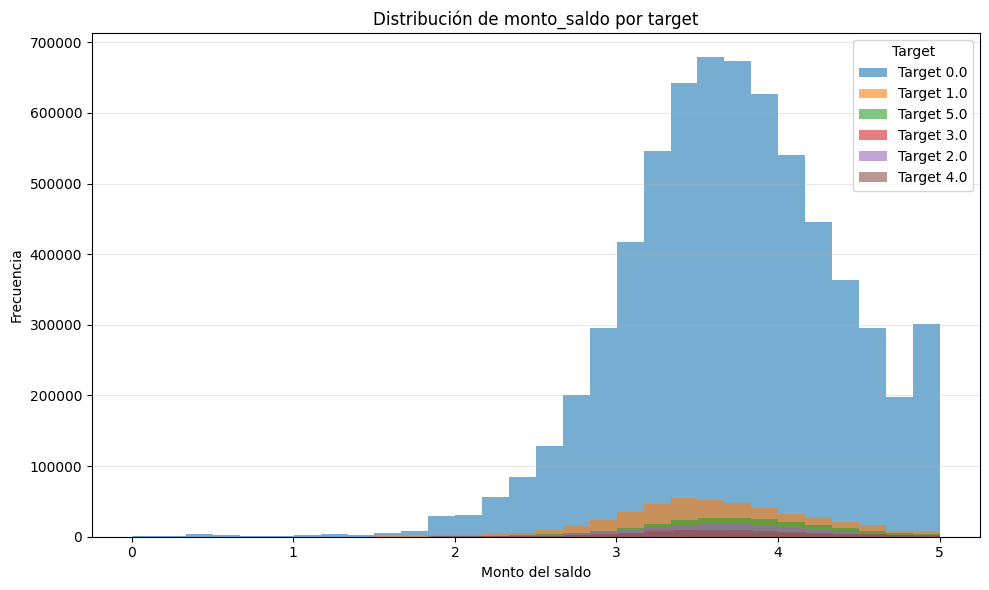

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Excluimos filas con NaN en 'target' o 'monto_saldo'
df_plot = df_base_saldos_creditos.dropna(subset=['target', 'monto_saldo'])

# Obtenemos los valores únicos de target
target_values = df_plot['target'].unique()

plt.figure(figsize=(10,6))

# Graficamos un histograma por cada target
for target in target_values:
    subset = df_plot[df_plot['target'] == target]
    plt.hist(subset['monto_saldo'], bins=30, alpha=0.6, label=f'Target {target}')

plt.title('Distribución de monto_saldo por target')
plt.xlabel('Monto del saldo')
plt.ylabel('Frecuencia')
plt.legend(title='Target')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


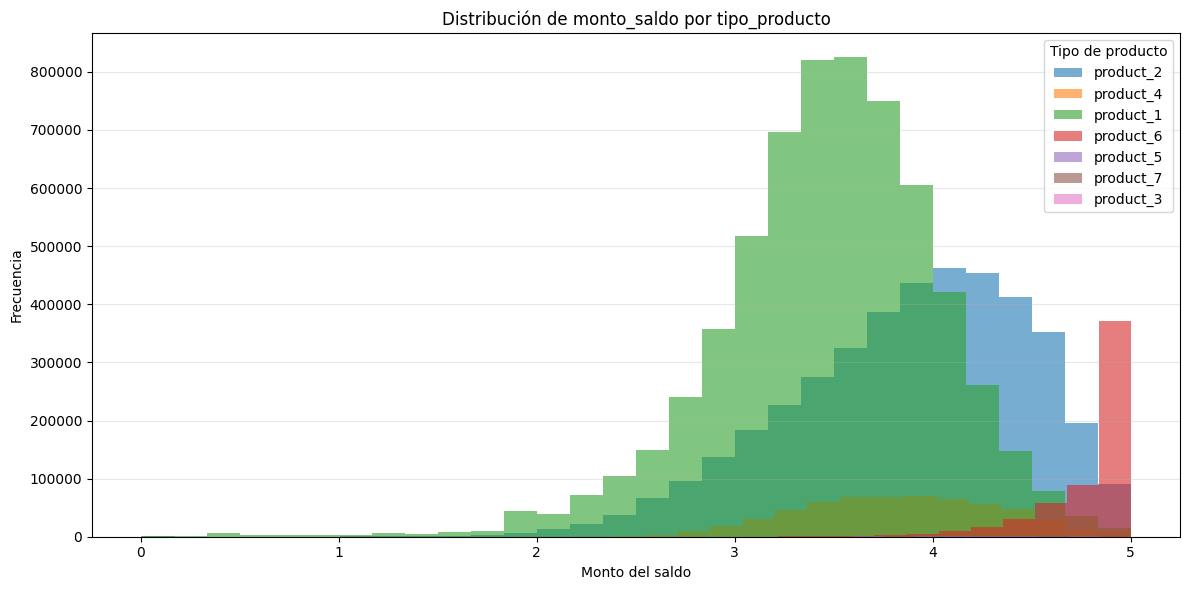

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Excluimos filas con NaN en 'monto_saldo' o 'tipo_producto'
df_plot = df_base_saldos_creditos.dropna(subset=['monto_saldo', 'tipo_producto'])

# Obtenemos los valores únicos de tipo_producto
productos = df_plot['tipo_producto'].unique()

plt.figure(figsize=(12,6))

# Graficamos un histograma por cada tipo de producto
for producto in productos:
    subset = df_plot[df_plot['tipo_producto'] == producto]
    plt.hist(subset['monto_saldo'], bins=30, alpha=0.6, label=f'{producto}')

plt.title('Distribución de monto_saldo por tipo_producto')
plt.xlabel('Monto del saldo')
plt.ylabel('Frecuencia')
plt.legend(title='Tipo de producto')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


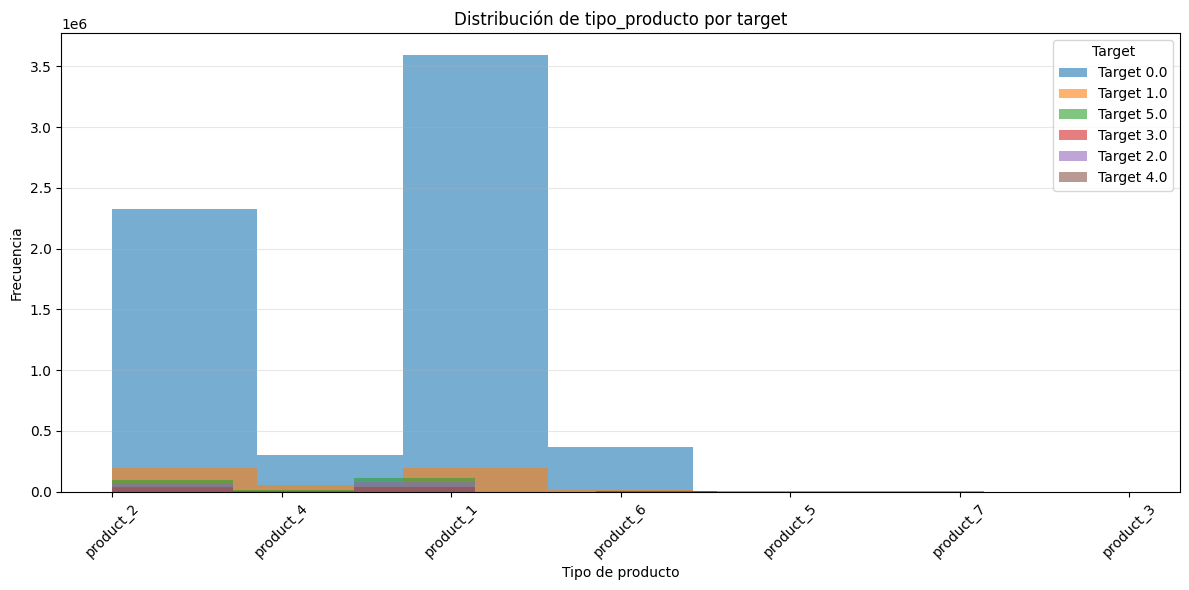

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Excluimos filas con NaN en 'target' o 'tipo_producto'
df_plot = df_base_saldos_creditos.dropna(subset=['target', 'tipo_producto'])

# Obtenemos los valores únicos de target
target_values = df_plot['target'].unique()

plt.figure(figsize=(12,6))

# Graficamos un histograma por cada target
for target in target_values:
    subset = df_plot[df_plot['target'] == target]
    plt.hist(subset['tipo_producto'], bins=len(df_plot['tipo_producto'].unique()), 
             alpha=0.6, label=f'Target {target}')

plt.title('Distribución de tipo_producto por target')
plt.xlabel('Tipo de producto')
plt.ylabel('Frecuencia')
plt.legend(title='Target')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)  # Gira los nombres para que no se solapen
plt.tight_layout()
plt.show()


In [39]:
import pandas as pd

# Mostrar todas las filas (None = sin límite)
pd.set_option('display.max_rows', None)

# Mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Mostrar el contenido completo de cada celda (sin truncar strings)
pd.set_option('display.max_colwidth', None)

# Opcional: mostrar más ancho en pantalla
pd.set_option('display.width', 200)

df_base_saldos_creditos.query('monto_saldo == 5').head(10)


,mes,ID,tipo_credito,tipo_producto,inst_fin,monto_saldo,dias_atraso,periodo,target
32,7,f8f771148f1b487f6b96c6719b330516115de17eaa43f6e8e8a59f40996aa0c7,type_3,product_2,entity_3,5.0,0.000,period_5,0.0
135,4,27c9e745418da42a39ee8cd5b8cb33c28956e983ca9264a8544998a153b399ae,type_3,product_1,entity_3,5.0,0.000,period_5,0.0
224,1,7ce1ada352fb0d01af336fcf3d2c144f7a071b089eea4eb7481b96694e45bd21,type_3,product_1,entity_3,5.0,0.000,period_5,0.0
556,6,f0d24624f9c4c745a28292709f00da10ee80d9e45b00d52d72e61315ab40b435,type_3,product_1,entity_3,5.0,3.943,period_5,0.0
652,2,088df3279759276a9d9b289eed28afa9e2dc5ef4809cb20699040a5b4e17be6f,type_3,product_1,entity_3,5.0,0.000,period_5,0.0
661,8,1dade056e9d7ee88bfc1ae40a2922963f0af67c675d8d0c59318794de2720ff5,type_3,product_1,entity_3,5.0,0.000,period_5,0.0
1145,2,6152ae6cd8f02aafbc581c85c897cc6f76c720aba612379034c68e37c23bf0f0,type_5,product_6,entity_3,5.0,0.000,period_5,0.0
1146,10,52ffcdcc8f0b85416bd6b3e0a19408c4b551bbbeb2de7610deae5f25415ee806,type_5,product_6,entity_3,5.0,0.000,period_5,0.0
1147,3,110136c0bb353ef03bb4c67a9c69418344f995b7eb90e99128958e13d69e807e,type_5,product_6,entity_3,5.0,0.000,period_5,0.0
1149,12,6eba212c0d98bc5a61d7045e19a4ebe4fcd68faa6dfc810ba72c1c8f76cb9af9,type_5,product_6,entity_3,5.0,0.000,period_5,0.0


In [40]:
df_base_saldos_creditos.query('ID == "00041fc67acedd7915c312b52dfab61c4305a04441a3052c63fe8f79d76991ff"').head(20)

,mes,ID,tipo_credito,tipo_producto,inst_fin,monto_saldo,dias_atraso,periodo,target
925197,11,00041fc67acedd7915c312b52dfab61c4305a04441a3052c63fe8f79d76991ff,type_5,product_6,entity_3,5.0000,0.0,period_2,0.0
959944,11,00041fc67acedd7915c312b52dfab61c4305a04441a3052c63fe8f79d76991ff,type_3,product_2,entity_3,4.4686,0.0,period_2,0.0
980908,6,00041fc67acedd7915c312b52dfab61c4305a04441a3052c63fe8f79d76991ff,type_3,product_1,entity_3,2.6759,0.0,period_2,0.0
1056591,9,00041fc67acedd7915c312b52dfab61c4305a04441a3052c63fe8f79d76991ff,type_3,product_1,entity_3,2.3661,0.0,period_2,0.0
1111423,12,00041fc67acedd7915c312b52dfab61c4305a04441a3052c63fe8f79d76991ff,type_3,product_1,entity_3,3.3038,0.0,period_2,0.0
2169240,4,00041fc67acedd7915c312b52dfab61c4305a04441a3052c63fe8f79d76991ff,type_5,product_6,entity_3,5.0000,0.0,period_2,0.0
2337341,5,00041fc67acedd7915c312b52dfab61c4305a04441a3052c63fe8f79d76991ff,type_5,product_6,entity_3,5.0000,0.0,period_2,0.0
3375241,11,00041fc67acedd7915c312b52dfab61c4305a04441a3052c63fe8f79d76991ff,type_3,product_1,entity_3,3.1070,0.0,period_2,0.0
3431925,3,00041fc67acedd7915c312b52dfab61c4305a04441a3052c63fe8f79d76991ff,type_5,product_6,entity_3,5.0000,0.0,period_2,0.0
4602834,9,00041fc67acedd7915c312b52dfab61c4305a04441a3052c63fe8f79d76991ff,type_5,product_6,entity_3,5.0000,0.0,period_2,0.0


In [41]:
print(f"monto saldo igual a 1 son {len(df_base_saldos_creditos.query('monto_saldo == 1'))} registros")
print(f"monto saldo igual a 2 son {len(df_base_saldos_creditos.query('monto_saldo == 2'))} registros")
print(f"monto saldo igual a 3 son {len(df_base_saldos_creditos.query('monto_saldo == 3'))} registros")
print(f"monto saldo igual a 4 son {len(df_base_saldos_creditos.query('monto_saldo == 4'))} registros")
print(f"monto saldo igual a 4.99 son {len(df_base_saldos_creditos.query('monto_saldo == 4.99'))} registros")
print(f"monto saldo igual a 5 son {len(df_base_saldos_creditos.query('monto_saldo == 5'))} registros")

monto saldo igual a 1 son 18 registros
monto saldo igual a 2 son 15 registros
monto saldo igual a 3 son 336 registros
monto saldo igual a 4 son 594 registros
monto saldo igual a 4.99 son 116 registros
monto saldo igual a 5 son 298329 registros


In [42]:
df_base_saldos_creditos.inst_fin.value_counts()

inst_fin
entity_3    5755807
entity_1    2548342
entity_5    1186379
entity_4    1176280
entity_2     930977
Name: count, dtype: int64

In [43]:
df_base_saldos_creditos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11597785 entries, 0 to 11597784
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   mes            int64  
 1   ID             object 
 2   tipo_credito   object 
 3   tipo_producto  object 
 4   inst_fin       object 
 5   monto_saldo    float64
 6   dias_atraso    float64
 7   periodo        object 
 8   target         float64
dtypes: float64(3), int64(1), object(5)
memory usage: 796.4+ MB


In [44]:
df_base_saldos_creditos.describe()

,mes,monto_saldo,dias_atraso,target
count,1.159778e+07,1.159778e+07,1.159778e+07,7.569171e+06
mean,6.673574e+00,3.703500e+00,1.877785e-01,3.178973e-01
std,3.449925e+00,6.486027e-01,8.981397e-01,1.013715e+00
min,1.000000e+00,3.000000e-03,0.000000e+00,0.000000e+00
25%,4.000000e+00,3.292100e+00,0.000000e+00,0.000000e+00
50%,7.000000e+00,3.703600e+00,0.000000e+00,0.000000e+00
75%,1.000000e+01,4.142900e+00,0.000000e+00,0.000000e+00
max,1.200000e+01,5.000000e+00,5.000000e+00,5.000000e+00


Creación de nuevas variables derivadas [der_var1_var2]

Creación de variables agregadas

In [45]:
import pandas as pd
from functools import reduce

# Asegurar orden correcto por mes
df_base_saldos_creditos = df_base_saldos_creditos.sort_values(by=['ID', 'mes'], ascending=[True, False])

# Obtener mes máximo disponible (por si no es 12)
mes_max = df_base_saldos_creditos['mes'].max()

# Función que calcula agregados para los últimos n meses
def agregar_por_meses(df, n, mes_max):
    meses = list(range(mes_max, mes_max - n, -1))  # Ej: 12→[12,11,10,...]
    sufijo = f"{n}_meses"
    return (
        df[df['mes'].isin(meses)]
        .groupby('ID', as_index=False)
        .agg(
            **{
                f"{sufijo}_max_monto_saldo": ('monto_saldo', 'max'),
                f"{sufijo}_min_monto_saldo": ('monto_saldo', 'min'),
                f"{sufijo}_sum_monto_saldo": ('monto_saldo', 'sum'),
                f"{sufijo}_prom_monto_saldo": ('monto_saldo', 'mean')
            }
        )
    )

# Generar automáticamente los agregados desde 2 hasta 12 meses
agregados_list = [agregar_por_meses(df_base_saldos_creditos, n, mes_max) for n in range(2, 13)]

# Unir todos los dataframes por 'ID'
df_agregados_base_saldos_creditos = reduce(lambda left, right: pd.merge(left, right, on='ID', how='outer'), agregados_list)

# Verificar resultado
print(df_agregados_base_saldos_creditos.shape)
df_agregados_base_saldos_creditos.head()


(505697, 45)


,ID,2_meses_max_monto_saldo,2_meses_min_monto_saldo,2_meses_sum_monto_saldo,2_meses_prom_monto_saldo,3_meses_max_monto_saldo,3_meses_min_monto_saldo,3_meses_sum_monto_saldo,3_meses_prom_monto_saldo,4_meses_max_monto_saldo,4_meses_min_monto_saldo,4_meses_sum_monto_saldo,4_meses_prom_monto_saldo,5_meses_max_monto_saldo,5_meses_min_monto_saldo,5_meses_sum_monto_saldo,5_meses_prom_monto_saldo,6_meses_max_monto_saldo,6_meses_min_monto_saldo,6_meses_sum_monto_saldo,6_meses_prom_monto_saldo,7_meses_max_monto_saldo,7_meses_min_monto_saldo,7_meses_sum_monto_saldo,7_meses_prom_monto_saldo,8_meses_max_monto_saldo,8_meses_min_monto_saldo,8_meses_sum_monto_saldo,8_meses_prom_monto_saldo,9_meses_max_monto_saldo,9_meses_min_monto_saldo,9_meses_sum_monto_saldo,9_meses_prom_monto_saldo,10_meses_max_monto_saldo,10_meses_min_monto_saldo,10_meses_sum_monto_saldo,10_meses_prom_monto_saldo,11_meses_max_monto_saldo,11_meses_min_monto_saldo,11_meses_sum_monto_saldo,11_meses_prom_monto_saldo,12_meses_max_monto_saldo,12_meses_min_monto_saldo,12_meses_sum_monto_saldo,12_meses_prom_monto_saldo
0,00000f6dd2df6f081ce59cc4490f152e3fd5695de62bd92ba7d880f22dfc0c4a,3.1754,3.1754,6.3508,3.1754,3.2202,3.1754,9.5710,3.190333,3.2202,3.1754,9.5710,3.190333,3.2202,3.1754,9.5710,3.190333,3.2202,3.1754,9.5710,3.190333,3.2202,3.1754,9.5710,3.190333,3.2202,3.1754,9.5710,3.190333,3.2202,3.1754,9.5710,3.190333,3.2202,3.1754,9.5710,3.190333,3.2202,3.1754,9.5710,3.190333,3.2202,3.1754,9.5710,3.190333
1,00007a4554cd3a350aec583adebe766eb0beef5684f3ddca436ad026aee12c21,4.1010,2.8456,36.1860,3.6186,4.1019,2.8456,53.9995,3.599967,4.1147,2.8456,71.7509,3.587545,4.1204,2.8456,89.5029,3.580116,4.1298,2.8456,107.3370,3.577900,4.1437,2.8456,121.7075,3.579632,4.1437,2.8456,136.0138,3.579311,4.1437,2.8456,150.4262,3.581576,4.1437,1.6760,168.1009,3.502102,4.1437,1.6760,185.8538,3.441737,4.1437,1.6760,203.6407,3.394012
2,000095b7b77ff622b2130f2d4bfa1e8d81f1fc4580a24872e8a58b1fa66ce45a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3856,2.3856,2.3856,2.385600,2.3856,2.3856,4.7712,2.385600
3,00009bb00e84af44d1abc86b9fbd155842ffef6cad814d0244655051659fdbff,3.9005,1.7495,16.4935,3.2987,3.9005,1.7495,26.3618,3.295225,3.9005,1.7495,36.1795,3.289045,3.9005,1.7495,45.9991,3.285650,3.9005,1.7495,55.9205,3.289441,3.9005,1.7495,65.9505,3.297525,3.9005,1.7495,76.0214,3.305278,3.9005,1.7495,82.9543,3.318172,3.9005,1.7495,89.5382,3.316230,3.9005,1.7495,96.1017,3.313852,3.9005,1.7495,102.7161,3.313423
4,0000a9728fc57abef25c2fc0424c9c907a5559e7b8b559eb5b40753a09ea532d,4.9799,2.7285,23.7864,3.9644,4.9832,2.7285,35.8494,3.983267,4.9837,2.7285,47.8147,3.984558,4.9844,2.7285,60.0085,4.000567,4.9848,2.7285,72.0655,4.003639,4.9856,2.7285,84.0580,4.002762,4.9861,2.7285,96.2285,4.009521,4.9866,2.7285,108.5887,4.021804,4.9899,2.7285,120.9697,4.032323,4.9904,2.7285,133.3420,4.040667,4.9909,2.7285,150.1906,4.059205


In [46]:
import pandas as pd

# ============================
# 1. Ordenar correctamente
# ============================
df_base_saldos_creditos = df_base_saldos_creditos.sort_values(by=['ID', 'mes'], ascending=[True, True])

# ============================
# 2. Diferencias y % cambio (último mes)
# ============================
df_base_saldos_creditos['diff_monto_saldo'] = df_base_saldos_creditos.groupby('ID')['monto_saldo'].diff()
df_base_saldos_creditos['pct_change_monto_saldo'] = df_base_saldos_creditos.groupby('ID')['monto_saldo'].pct_change()
df_base_saldos_creditos['diff_dias_atraso'] = df_base_saldos_creditos.groupby('ID')['dias_atraso'].diff()
df_base_saldos_creditos['pct_change_dias_atraso'] = df_base_saldos_creditos.groupby('ID')['dias_atraso'].pct_change()

df_diff = df_base_saldos_creditos[df_base_saldos_creditos['mes'] == df_base_saldos_creditos.groupby('ID')['mes'].transform('max')][[
    'ID', 'diff_monto_saldo', 'pct_change_monto_saldo', 'diff_dias_atraso', 'pct_change_dias_atraso'
]]

df_agregados_base_saldos_creditos = df_agregados_base_saldos_creditos.merge(df_diff, on='ID', how='left')

# ============================
# 3. Variabilidad del saldo
# ============================
df_variabilidad = df_base_saldos_creditos.groupby('ID').agg(
    std_monto_saldo=('monto_saldo', 'std')
).reset_index()
df_agregados_base_saldos_creditos = df_agregados_base_saldos_creditos.merge(df_variabilidad, on='ID', how='left')

# ============================
# 4. Diversificación de créditos/productos/entidades
# ============================
df_diversificacion = df_base_saldos_creditos.groupby('ID').agg(
    n_tipo_credito=('tipo_credito', 'nunique'),
    n_tipo_producto=('tipo_producto', 'nunique'),
    n_inst_fin=('inst_fin', 'nunique')
).reset_index()
df_agregados_base_saldos_creditos = df_agregados_base_saldos_creditos.merge(df_diversificacion, on='ID', how='left')

# ============================
# 5. Agregados de atraso
# ============================
df_atraso = df_base_saldos_creditos.groupby('ID').agg(
    max_dias_atraso=('dias_atraso', 'max'),
    mean_dias_atraso=('dias_atraso', 'mean'),
    sum_dias_atraso=('dias_atraso', 'sum')
).reset_index()
df_agregados_base_saldos_creditos = df_agregados_base_saldos_creditos.merge(df_atraso, on='ID', how='left')

# ============================
# 6. Ratio saldo vs promedio histórico (último mes)
# ============================
df_base_saldos_creditos['ratio_saldo_prom'] = df_base_saldos_creditos['monto_saldo'] / (
    df_base_saldos_creditos.groupby('ID')['monto_saldo'].transform('mean') + 1e-6
)
df_ratio = df_base_saldos_creditos[df_base_saldos_creditos['mes'] == df_base_saldos_creditos.groupby('ID')['mes'].transform('max')][
    ['ID', 'ratio_saldo_prom']
]
df_agregados_base_saldos_creditos = df_agregados_base_saldos_creditos.merge(df_ratio, on='ID', how='left')

# ============================
# 7. Concentración por entidad principal
# ============================
entidad_sum = df_base_saldos_creditos.groupby(['ID', 'inst_fin'])['monto_saldo'].sum().reset_index()
entidad_max = entidad_sum.loc[entidad_sum.groupby('ID')['monto_saldo'].idxmax()]
total_saldo = df_base_saldos_creditos.groupby('ID')['monto_saldo'].sum().reset_index().rename(columns={'monto_saldo':'total_saldo'})
df_concentracion = pd.merge(entidad_max, total_saldo, on='ID', how='left')
df_concentracion['pct_saldo_entidad_principal'] = df_concentracion['monto_saldo'] / (df_concentracion['total_saldo'] + 1e-6)
df_concentracion = df_concentracion[['ID', 'pct_saldo_entidad_principal']]
df_agregados_base_saldos_creditos = df_agregados_base_saldos_creditos.merge(df_concentracion, on='ID', how='left')

# ============================
# 8. Verificar resultado final
# ============================
print(df_agregados_base_saldos_creditos.shape)
df_agregados_base_saldos_creditos.head()


(3107356, 58)


,ID,2_meses_max_monto_saldo,2_meses_min_monto_saldo,2_meses_sum_monto_saldo,2_meses_prom_monto_saldo,3_meses_max_monto_saldo,3_meses_min_monto_saldo,3_meses_sum_monto_saldo,3_meses_prom_monto_saldo,4_meses_max_monto_saldo,4_meses_min_monto_saldo,4_meses_sum_monto_saldo,4_meses_prom_monto_saldo,5_meses_max_monto_saldo,5_meses_min_monto_saldo,5_meses_sum_monto_saldo,5_meses_prom_monto_saldo,6_meses_max_monto_saldo,6_meses_min_monto_saldo,6_meses_sum_monto_saldo,6_meses_prom_monto_saldo,7_meses_max_monto_saldo,7_meses_min_monto_saldo,7_meses_sum_monto_saldo,7_meses_prom_monto_saldo,8_meses_max_monto_saldo,8_meses_min_monto_saldo,8_meses_sum_monto_saldo,8_meses_prom_monto_saldo,9_meses_max_monto_saldo,9_meses_min_monto_saldo,9_meses_sum_monto_saldo,9_meses_prom_monto_saldo,10_meses_max_monto_saldo,10_meses_min_monto_saldo,10_meses_sum_monto_saldo,10_meses_prom_monto_saldo,11_meses_max_monto_saldo,11_meses_min_monto_saldo,11_meses_sum_monto_saldo,11_meses_prom_monto_saldo,12_meses_max_monto_saldo,12_meses_min_monto_saldo,12_meses_sum_monto_saldo,12_meses_prom_monto_saldo,diff_monto_saldo,pct_change_monto_saldo,diff_dias_atraso,pct_change_dias_atraso,std_monto_saldo,n_tipo_credito,n_tipo_producto,n_inst_fin,max_dias_atraso,mean_dias_atraso,sum_dias_atraso,ratio_saldo_prom,pct_saldo_entidad_principal
0,00000f6dd2df6f081ce59cc4490f152e3fd5695de62bd92ba7d880f22dfc0c4a,3.1754,3.1754,6.3508,3.1754,3.2202,3.1754,9.5710,3.190333,3.2202,3.1754,9.5710,3.190333,3.2202,3.1754,9.5710,3.190333,3.2202,3.1754,9.571,3.190333,3.2202,3.1754,9.5710,3.190333,3.2202,3.1754,9.5710,3.190333,3.2202,3.1754,9.5710,3.190333,3.2202,3.1754,9.5710,3.190333,3.2202,3.1754,9.5710,3.190333,3.2202,3.1754,9.5710,3.190333,0.0000,0.000000,0.0,NaN,0.025865,1,1,1,0.000,0.00000,0.000,0.995319,1.000000
1,00007a4554cd3a350aec583adebe766eb0beef5684f3ddca436ad026aee12c21,4.1010,2.8456,36.1860,3.6186,4.1019,2.8456,53.9995,3.599967,4.1147,2.8456,71.7509,3.587545,4.1204,2.8456,89.5029,3.580116,4.1298,2.8456,107.337,3.577900,4.1437,2.8456,121.7075,3.579632,4.1437,2.8456,136.0138,3.579311,4.1437,2.8456,150.4262,3.581576,4.1437,1.6760,168.1009,3.502102,4.1437,1.6760,185.8538,3.441737,4.1437,1.6760,203.6407,3.394012,1.0546,0.368741,0.0,NaN,0.641316,1,2,4,4.713,0.07855,4.713,1.153384,0.413637
2,00007a4554cd3a350aec583adebe766eb0beef5684f3ddca436ad026aee12c21,4.1010,2.8456,36.1860,3.6186,4.1019,2.8456,53.9995,3.599967,4.1147,2.8456,71.7509,3.587545,4.1204,2.8456,89.5029,3.580116,4.1298,2.8456,107.337,3.577900,4.1437,2.8456,121.7075,3.579632,4.1437,2.8456,136.0138,3.579311,4.1437,2.8456,150.4262,3.581576,4.1437,1.6760,168.1009,3.502102,4.1437,1.6760,185.8538,3.441737,4.1437,1.6760,203.6407,3.394012,1.0546,0.368741,0.0,NaN,0.641316,1,2,4,4.713,0.07855,4.713,1.105535,0.413637
3,00007a4554cd3a350aec583adebe766eb0beef5684f3ddca436ad026aee12c21,4.1010,2.8456,36.1860,3.6186,4.1019,2.8456,53.9995,3.599967,4.1147,2.8456,71.7509,3.587545,4.1204,2.8456,89.5029,3.580116,4.1298,2.8456,107.337,3.577900,4.1437,2.8456,121.7075,3.579632,4.1437,2.8456,136.0138,3.579311,4.1437,2.8456,150.4262,3.581576,4.1437,1.6760,168.1009,3.502102,4.1437,1.6760,185.8538,3.441737,4.1437,1.6760,203.6407,3.394012,1.0546,0.368741,0.0,NaN,0.641316,1,2,4,4.713,0.07855,4.713,1.027810,0.413637
4,00007a4554cd3a350aec583adebe766eb0beef5684f3ddca436ad026aee12c21,4.1010,2.8456,36.1860,3.6186,4.1019,2.8456,53.9995,3.599967,4.1147,2.8456,71.7509,3.587545,4.1204,2.8456,89.5029,3.580116,4.1298,2.8456,107.337,3.577900,4.1437,2.8456,121.7075,3.579632,4.1437,2.8456,136.0138,3.579311,4.1437,2.8456,150.4262,3.581576,4.1437,1.6760,168.1009,3.502102,4.1437,1.6760,185.8538,3.441737,4.1437,1.6760,203.6407,3.394012,1.0546,0.368741,0.0,NaN,0.641316,1,2,4,4.713,0.07855,4.713,0.838418,0.413637


In [47]:
df_id_tipo_credito_mas_consumido = (
    df_base_saldos_creditos
    .groupby(['ID', 'tipo_credito'])
    .size()
    .reset_index(name='type_cred_by_inst_finan_count')

)

# Para cada ID, obtener el índice del tipo_credito con mayor conteo
idx_max = df_id_tipo_credito_mas_consumido.groupby('ID')['type_cred_by_inst_finan_count'].idxmax()

# Seleccionar esas filas
df_tipo_credito_max = df_id_tipo_credito_mas_consumido.loc[idx_max].reset_index(drop=True)

df_tipo_credito_max.head()

df_base_saldos_creditos = df_base_saldos_creditos
df_base_saldos_creditos = df_base_saldos_creditos[['ID', 'tipo_credito']].rename(columns={'tipo_credito': 'tipo_credito_mas_consumido'})


In [48]:
df_base_saldos_creditos = df_base_saldos_creditos.merge(
    df_tipo_credito_max,
    on='ID',
    how='left'
)

Concatenar tablas

In [49]:
import pandas as pd

# 1️⃣ Renombrar columnas del df_base (excepto la llave ID)
df_base_renamed = df_agregados_base_saldos_creditos.rename(
    columns={col: f"DB_SAL_CRE_{col}" for col in df_agregados_base_saldos_creditos.columns if col != 'ID'}
)

# 2️⃣ INNER JOIN: solo registros que coinciden
df_universo = df_universo.merge(
    df_base_renamed,
    on='ID',
    how='inner'
)

# 3️⃣ Verificación final
print("✅ Dimensiones finales:", df_universo.shape)
print(f"✅ Registros totales después del merge: {len(df_universo)}")
df_universo.head()

✅ Dimensiones finales: (2035628, 141)
✅ Registros totales después del merge: 2035628


,ID,target,periodo,DB_CLI_edad,DB_CLI_ingreso,DB_CLI_anios_exp,DB_CLI_tipo_empleo,DB_CLI_buro_de_credito,DB_CLI_pago_nomina,DB_CLI_tc,DB_CLI_prest_per,DB_CLI_prest_veh_hip,DB_CLI_cuenta_ahorro,DB_CLI_ofer_prest_per,DB_CLI_ofer_tc,DB_CLI_ofer_compra_deuda,DB_CLI_der_ingreso_por_anio_exp,DB_CLI_der_edad_laboral_relativa,DB_CLI_der_edad_ingreso_relativa,DB_CLI_der_edad_anios_exp,DB_CLI_der_ingreso_edad_exp,DB_CLI_der_ingreso_vs_nomina,DB_CLI_der_nomina_vs_exp,DB_CLI_der_ingreso_nomina_ratio,DB_CLI_num_productos,DB_CLI_num_ofertas,DB_CLI_relacion_ofertas_uso,DB_CLI_usa_tc_y_ahorro,DB_CLI_usa_prestamo_y_tc,DB_CLI_tiene_creditos_multiples,DB_CLI_oferta_credito_activo,DB_CLI_oferta_total_vs_uso,DB_CLI_riesgo_credito_grupo,DB_SAL_CUE_2_meses_max_saldo_ahorros,DB_SAL_CUE_2_meses_min_saldo_ahorros,DB_SAL_CUE_2_meses_sum_saldo_ahorros,DB_SAL_CUE_2_meses_prom_saldo_ahorros,DB_SAL_CUE_3_meses_max_saldo_ahorros,DB_SAL_CUE_3_meses_min_saldo_ahorros,DB_SAL_CUE_3_meses_sum_saldo_ahorros,DB_SAL_CUE_3_meses_prom_saldo_ahorros,DB_SAL_CUE_4_meses_max_saldo_ahorros,DB_SAL_CUE_4_meses_min_saldo_ahorros,DB_SAL_CUE_4_meses_sum_saldo_ahorros,DB_SAL_CUE_4_meses_prom_saldo_ahorros,DB_SAL_CUE_5_meses_max_saldo_ahorros,DB_SAL_CUE_5_meses_min_saldo_ahorros,DB_SAL_CUE_5_meses_sum_saldo_ahorros,DB_SAL_CUE_5_meses_prom_saldo_ahorros,DB_SAL_CUE_6_meses_max_saldo_ahorros,DB_SAL_CUE_6_meses_min_saldo_ahorros,DB_SAL_CUE_6_meses_sum_saldo_ahorros,DB_SAL_CUE_6_meses_prom_saldo_ahorros,DB_SAL_CUE_7_meses_max_saldo_ahorros,DB_SAL_CUE_7_meses_min_saldo_ahorros,DB_SAL_CUE_7_meses_sum_saldo_ahorros,DB_SAL_CUE_7_meses_prom_saldo_ahorros,DB_SAL_CUE_8_meses_max_saldo_ahorros,DB_SAL_CUE_8_meses_min_saldo_ahorros,DB_SAL_CUE_8_meses_sum_saldo_ahorros,DB_SAL_CUE_8_meses_prom_saldo_ahorros,DB_SAL_CUE_9_meses_max_saldo_ahorros,DB_SAL_CUE_9_meses_min_saldo_ahorros,DB_SAL_CUE_9_meses_sum_saldo_ahorros,DB_SAL_CUE_9_meses_prom_saldo_ahorros,DB_SAL_CUE_10_meses_max_saldo_ahorros,DB_SAL_CUE_10_meses_min_saldo_ahorros,DB_SAL_CUE_10_meses_sum_saldo_ahorros,DB_SAL_CUE_10_meses_prom_saldo_ahorros,DB_SAL_CUE_11_meses_max_saldo_ahorros,DB_SAL_CUE_11_meses_min_saldo_ahorros,DB_SAL_CUE_11_meses_sum_saldo_ahorros,DB_SAL_CUE_11_meses_prom_saldo_ahorros,DB_SAL_CUE_12_meses_max_saldo_ahorros,DB_SAL_CUE_12_meses_min_saldo_ahorros,DB_SAL_CUE_12_meses_sum_saldo_ahorros,DB_SAL_CUE_12_meses_prom_saldo_ahorros,DB_SAL_CUE_std_3m_ahorros,DB_SAL_CUE_cv_3m_ahorros,DB_SAL_CUE_ratio_ahorros_otros,DB_SAL_CUE_prop_ahorros_total,DB_SAL_CUE_mes_max_saldo,DB_SAL_CUE_mes_min_saldo,DB_SAL_CUE_meses_caida_consecutiva,DB_SAL_CRE_2_meses_max_monto_saldo,DB_SAL_CRE_2_meses_min_monto_saldo,DB_SAL_CRE_2_meses_sum_monto_saldo,DB_SAL_CRE_2_meses_prom_monto_saldo,DB_SAL_CRE_3_meses_max_monto_saldo,DB_SAL_CRE_3_meses_min_monto_saldo,DB_SAL_CRE_3_meses_sum_monto_saldo,DB_SAL_CRE_3_meses_prom_monto_saldo,DB_SAL_CRE_4_meses_max_monto_saldo,DB_SAL_CRE_4_meses_min_monto_saldo,DB_SAL_CRE_4_meses_sum_monto_saldo,DB_SAL_CRE_4_meses_prom_monto_saldo,DB_SAL_CRE_5_meses_max_monto_saldo,DB_SAL_CRE_5_meses_min_monto_saldo,DB_SAL_CRE_5_meses_sum_monto_saldo,DB_SAL_CRE_5_meses_prom_monto_saldo,DB_SAL_CRE_6_meses_max_monto_saldo,DB_SAL_CRE_6_meses_min_monto_saldo,DB_SAL_CRE_6_meses_sum_monto_saldo,DB_SAL_CRE_6_meses_prom_monto_saldo,DB_SAL_CRE_7_meses_max_monto_saldo,DB_SAL_CRE_7_meses_min_monto_saldo,DB_SAL_CRE_7_meses_sum_monto_saldo,DB_SAL_CRE_7_meses_prom_monto_saldo,DB_SAL_CRE_8_meses_max_monto_saldo,DB_SAL_CRE_8_meses_min_monto_saldo,DB_SAL_CRE_8_meses_sum_monto_saldo,DB_SAL_CRE_8_meses_prom_monto_saldo,DB_SAL_CRE_9_meses_max_monto_saldo,DB_SAL_CRE_9_meses_min_monto_saldo,DB_SAL_CRE_9_meses_sum_monto_saldo,DB_SAL_CRE_9_meses_prom_monto_saldo,DB_SAL_CRE_10_meses_max_monto_saldo,DB_SAL_CRE_10_meses_min_monto_saldo,DB_SAL_CRE_10_meses_sum_monto_saldo,DB_SAL_CRE_10_meses_prom_monto_saldo,DB_SAL_CRE_11_meses_max_monto_saldo,DB_SAL_CRE_11_meses_min_monto_saldo,DB_SAL_CRE_11_meses_sum_monto_saldo,DB_SAL_CRE_11_meses_prom_monto_saldo,DB_SAL_CR

## df_base_consumos

In [50]:
df_base_consumos.head()

,periodo,ID,mes,compra_supermercado,compra_restaurante,compra_salud,compra_transporte
0,period_9,a66d4bbb5278c8a586e03d81e1be8d3590060d8f37fb8c64d5e26bbe8f3e3537,12,0.0000,0.0000,0.0000,3.9437
1,period_9,0d0a4fb4f1c98add65a45cf8882e1d81848502143f4ae2371b42be9cf1eb6e67,1,3.7397,3.3499,0.0000,0.0000
2,period_9,a5b9c4d7ae3dfe5cc1c0ca073b0cb0369e1389bfec5c56420a56b1df954fa88c,4,3.6273,3.9726,3.6655,4.4131
3,period_9,8a583965c827c377690b816c90246eaedc499f03a5f25fea0bbe0788cb20de5e,8,3.7855,4.8286,5.0000,4.5094
4,period_9,e53bf4249c7d6d573d532b8b0bad7ffe2fb203a4f006752069030d2669a57e2f,7,2.6077,3.9344,1.3229,3.8061


In [51]:
df_base_consumos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3697738 entries, 0 to 3697737
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   periodo              object 
 1   ID                   object 
 2   mes                  int64  
 3   compra_supermercado  float64
 4   compra_restaurante   float64
 5   compra_salud         float64
 6   compra_transporte    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 197.5+ MB


In [52]:
df_base_consumos.describe()

,mes,compra_supermercado,compra_restaurante,compra_salud,compra_transporte
count,3.697738e+06,3.697738e+06,3.697738e+06,3.697738e+06,3.697738e+06
mean,6.735978e+00,2.035837e+00,2.505474e+00,1.517864e+00,1.539931e+00
std,3.450599e+00,1.849150e+00,1.734254e+00,1.820631e+00,1.875185e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.000000e+00,2.500800e+00,3.066600e+00,0.000000e+00,0.000000e+00
75%,1.000000e+01,3.703300e+00,3.872100e+00,3.313200e+00,3.458500e+00
max,1.200000e+01,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


Creación de nuevas variables derivadas [der_var1_var2]

Creación de variables agregadas

In [53]:
import pandas as pd
from functools import reduce

# Asegurar orden correcto por mes
df_base_consumos = df_base_consumos.sort_values(by=['ID', 'mes'], ascending=[True, False])

# Lista de variables a agregar
vars_consumo = ['compra_supermercado', 'compra_restaurante', 'compra_salud', 'compra_transporte']

# Obtener mes máximo disponible (por si no es 12)
mes_max = df_base_consumos['mes'].max()

# -----------------------------
# Función general para agregar por n meses
# -----------------------------
def agregar_por_meses(df, n, mes_max, variables):
    meses = list(range(mes_max, mes_max - n, -1))
    sufijo = f"{n}_meses"

    # Construir diccionario dinámico de agregaciones
    agg_dict = {}
    for var in variables:
        agg_dict[f"{sufijo}_max_{var}"] = (var, 'max')
        agg_dict[f"{sufijo}_min_{var}"] = (var, 'min')
        agg_dict[f"{sufijo}_sum_{var}"] = (var, 'sum')
        agg_dict[f"{sufijo}_prom_{var}"] = (var, 'mean')

    return (
        df[df['mes'].isin(meses)]
        .groupby('ID', as_index=False)
        .agg(**agg_dict)
    )

# -----------------------------
# Crear agregados dinámicamente para 2 a 12 meses
# -----------------------------
agregados_list = [agregar_por_meses(df_base_consumos, n, mes_max, vars_consumo) for n in range(2, 13)]

# -----------------------------
# Unir todos los resultados
# -----------------------------
df_agregados_base_consumos = reduce(
    lambda left, right: pd.merge(left, right, on='ID', how='inner'),
    agregados_list
)


# -----------------------------
# Verificar resultado
# -----------------------------
print(df_agregados_base_consumos.shape)
df_agregados_base_consumos.head()


(404050, 177)


,ID,2_meses_max_compra_supermercado,2_meses_min_compra_supermercado,2_meses_sum_compra_supermercado,2_meses_prom_compra_supermercado,2_meses_max_compra_restaurante,2_meses_min_compra_restaurante,2_meses_sum_compra_restaurante,2_meses_prom_compra_restaurante,2_meses_max_compra_salud,2_meses_min_compra_salud,2_meses_sum_compra_salud,2_meses_prom_compra_salud,2_meses_max_compra_transporte,2_meses_min_compra_transporte,2_meses_sum_compra_transporte,2_meses_prom_compra_transporte,3_meses_max_compra_supermercado,3_meses_min_compra_supermercado,3_meses_sum_compra_supermercado,3_meses_prom_compra_supermercado,3_meses_max_compra_restaurante,3_meses_min_compra_restaurante,3_meses_sum_compra_restaurante,3_meses_prom_compra_restaurante,3_meses_max_compra_salud,3_meses_min_compra_salud,3_meses_sum_compra_salud,3_meses_prom_compra_salud,3_meses_max_compra_transporte,3_meses_min_compra_transporte,3_meses_sum_compra_transporte,3_meses_prom_compra_transporte,4_meses_max_compra_supermercado,4_meses_min_compra_supermercado,4_meses_sum_compra_supermercado,4_meses_prom_compra_supermercado,4_meses_max_compra_restaurante,4_meses_min_compra_restaurante,4_meses_sum_compra_restaurante,4_meses_prom_compra_restaurante,4_meses_max_compra_salud,4_meses_min_compra_salud,4_meses_sum_compra_salud,4_meses_prom_compra_salud,4_meses_max_compra_transporte,4_meses_min_compra_transporte,4_meses_sum_compra_transporte,4_meses_prom_compra_transporte,5_meses_max_compra_supermercado,5_meses_min_compra_supermercado,5_meses_sum_compra_supermercado,5_meses_prom_compra_supermercado,5_meses_max_compra_restaurante,5_meses_min_compra_restaurante,5_meses_sum_compra_restaurante,5_meses_prom_compra_restaurante,5_meses_max_compra_salud,5_meses_min_compra_salud,5_meses_sum_compra_salud,5_meses_prom_compra_salud,5_meses_max_compra_transporte,5_meses_min_compra_transporte,5_meses_sum_compra_transporte,5_meses_prom_compra_transporte,6_meses_max_compra_supermercado,6_meses_min_compra_supermercado,6_meses_sum_compra_supermercado,6_meses_prom_compra_supermercado,6_meses_max_compra_restaurante,6_meses_min_compra_restaurante,6_meses_sum_compra_restaurante,6_meses_prom_compra_restaurante,6_meses_max_compra_salud,6_meses_min_compra_salud,6_meses_sum_compra_salud,6_meses_prom_compra_salud,6_meses_max_compra_transporte,6_meses_min_compra_transporte,6_meses_sum_compra_transporte,6_meses_prom_compra_transporte,7_meses_max_compra_supermercado,7_meses_min_compra_supermercado,7_meses_sum_compra_supermercado,7_meses_prom_compra_supermercado,7_meses_max_compra_restaurante,7_meses_min_compra_restaurante,7_meses_sum_compra_restaurante,7_meses_prom_compra_restaurante,7_meses_max_compra_salud,7_meses_min_compra_salud,7_meses_sum_compra_salud,7_meses_prom_compra_salud,7_meses_max_compra_transporte,7_meses_min_compra_transporte,7_meses_sum_compra_transporte,7_meses_prom_compra_transporte,8_meses_max_compra_supermercado,8_meses_min_compra_supermercado,8_meses_sum_compra_supermercado,8_meses_prom_compra_supermercado,8_meses_max_compra_restaurante,8_meses_min_compra_restaurante,8_meses_sum_compra_restaurante,8_meses_prom_compra_restaurante,8_meses_max_compra_salud,8_meses_min_compra_salud,8_meses_sum_compra_salud,8_meses_prom_compra_salud,8_meses_max_compra_transporte,8_meses_min_compra_transporte,8_meses_sum_compra_transporte,8_meses_prom_compra_transporte,9_meses_max_compra_supermercado,9_meses_min_compra_supermercado,9_meses_sum_compra_supermercado,9_meses_prom_compra_supermercado,9_meses_max_compra_restaurante,9_meses_min_compra_restaurante,9_meses_sum_compra_restaurante,9_meses_prom_compra_restaurante,9_meses_max_compra_salud,9_meses_min_compra_salud,9_meses_sum_compra_salud,9_meses_prom_compra_salud,9_meses_max_compra_transporte,9_meses_min_compra_transporte,9_meses_sum_compra_transporte,9_meses_prom_compra_transporte,10_meses_max_compra_supermercado,10_meses_min_compra_supermercado,10_meses_sum_compra_supermercado,10_meses_prom_compra_supermercado,10_meses_max_compra_restaurante,10_meses_min_compra_res

In [54]:
import pandas as pd
from functools import reduce
import numpy as np

# -----------------------------
# Variables nuevas
# -----------------------------
# 1️⃣ Duración y comportamiento temporal
df_duracion_consumo = (
    df_base_consumos.groupby('ID')
    .agg(
        meses_activos=('mes', 'nunique')
    )
    .reset_index()
)

# 2️⃣ Tendencia de gasto
def slope(x):
    if len(x) < 2: return 0
    y = np.arange(len(x))
    return np.polyfit(y, x, 1)[0]

df_tendencia_consumo = (
    df_base_consumos.groupby('ID')[vars_consumo]
    .apply(lambda x: x.apply(slope))
    .reset_index()
)

# 3️⃣ Volatilidad
df_volatilidad_consumo = (
    df_base_consumos.groupby('ID')[vars_consumo]
    .agg(
        std_supermercado=('compra_supermercado', 'std'),
        std_restaurante=('compra_restaurante', 'std'),
        std_salud=('compra_salud', 'std'),
        std_transporte=('compra_transporte', 'std'),
    )
    .reset_index()
)

# Coeficiente de variación
media_consumo = df_base_consumos.groupby('ID')[vars_consumo].mean().reset_index()
df_volatilidad_consumo['cv_supermercado'] = df_volatilidad_consumo['std_supermercado'] / (media_consumo['compra_supermercado'] + 1e-6)
df_volatilidad_consumo['cv_restaurante'] = df_volatilidad_consumo['std_restaurante'] / (media_consumo['compra_restaurante'] + 1e-6)
df_volatilidad_consumo['cv_salud'] = df_volatilidad_consumo['std_salud'] / (media_consumo['compra_salud'] + 1e-6)
df_volatilidad_consumo['cv_transporte'] = df_volatilidad_consumo['std_transporte'] / (media_consumo['compra_transporte'] + 1e-6)

# 4️⃣ Proporciones de gasto
# Sumar cada columna por ID primero
df_suma = df_base_consumos.groupby('ID')[['compra_supermercado', 'compra_restaurante', 'compra_salud', 'compra_transporte']].sum().reset_index()

# Crear total_gasto y proporciones
df_suma['total_gasto'] = df_suma[['compra_supermercado', 'compra_restaurante', 'compra_salud', 'compra_transporte']].sum(axis=1)

df_suma['prop_supermercado'] = df_suma['compra_supermercado'] / (df_suma['total_gasto'] + 1e-6)
df_suma['prop_restaurante'] = df_suma['compra_restaurante'] / (df_suma['total_gasto'] + 1e-6)
df_suma['prop_salud'] = df_suma['compra_salud'] / (df_suma['total_gasto'] + 1e-6)
df_suma['prop_transporte'] = df_suma['compra_transporte'] / (df_suma['total_gasto'] + 1e-6)

# Renombrar como df_proporcion_consumo para mantener tu flujo
df_proporcion_consumo = df_suma[['ID', 'total_gasto', 'prop_supermercado', 'prop_restaurante', 'prop_salud', 'prop_transporte']]


# -----------------------------
# Unir todas las nuevas variables al dataframe de agregados
# -----------------------------
df_agregados_base_consumos = (
    df_agregados_base_consumos
    .merge(df_duracion_consumo, on='ID', how='left')
    .merge(df_tendencia_consumo, on='ID', how='left')
    .merge(df_volatilidad_consumo, on='ID', how='left')
    .merge(df_proporcion_consumo, on='ID', how='left')
)

# -----------------------------
# Verificación final
# -----------------------------
print(f"Shape final: {df_agregados_base_consumos.shape}")
df_agregados_base_consumos.head()


Shape final: (404050, 195)


,ID,2_meses_max_compra_supermercado,2_meses_min_compra_supermercado,2_meses_sum_compra_supermercado,2_meses_prom_compra_supermercado,2_meses_max_compra_restaurante,2_meses_min_compra_restaurante,2_meses_sum_compra_restaurante,2_meses_prom_compra_restaurante,2_meses_max_compra_salud,2_meses_min_compra_salud,2_meses_sum_compra_salud,2_meses_prom_compra_salud,2_meses_max_compra_transporte,2_meses_min_compra_transporte,2_meses_sum_compra_transporte,2_meses_prom_compra_transporte,3_meses_max_compra_supermercado,3_meses_min_compra_supermercado,3_meses_sum_compra_supermercado,3_meses_prom_compra_supermercado,3_meses_max_compra_restaurante,3_meses_min_compra_restaurante,3_meses_sum_compra_restaurante,3_meses_prom_compra_restaurante,3_meses_max_compra_salud,3_meses_min_compra_salud,3_meses_sum_compra_salud,3_meses_prom_compra_salud,3_meses_max_compra_transporte,3_meses_min_compra_transporte,3_meses_sum_compra_transporte,3_meses_prom_compra_transporte,4_meses_max_compra_supermercado,4_meses_min_compra_supermercado,4_meses_sum_compra_supermercado,4_meses_prom_compra_supermercado,4_meses_max_compra_restaurante,4_meses_min_compra_restaurante,4_meses_sum_compra_restaurante,4_meses_prom_compra_restaurante,4_meses_max_compra_salud,4_meses_min_compra_salud,4_meses_sum_compra_salud,4_meses_prom_compra_salud,4_meses_max_compra_transporte,4_meses_min_compra_transporte,4_meses_sum_compra_transporte,4_meses_prom_compra_transporte,5_meses_max_compra_supermercado,5_meses_min_compra_supermercado,5_meses_sum_compra_supermercado,5_meses_prom_compra_supermercado,5_meses_max_compra_restaurante,5_meses_min_compra_restaurante,5_meses_sum_compra_restaurante,5_meses_prom_compra_restaurante,5_meses_max_compra_salud,5_meses_min_compra_salud,5_meses_sum_compra_salud,5_meses_prom_compra_salud,5_meses_max_compra_transporte,5_meses_min_compra_transporte,5_meses_sum_compra_transporte,5_meses_prom_compra_transporte,6_meses_max_compra_supermercado,6_meses_min_compra_supermercado,6_meses_sum_compra_supermercado,6_meses_prom_compra_supermercado,6_meses_max_compra_restaurante,6_meses_min_compra_restaurante,6_meses_sum_compra_restaurante,6_meses_prom_compra_restaurante,6_meses_max_compra_salud,6_meses_min_compra_salud,6_meses_sum_compra_salud,6_meses_prom_compra_salud,6_meses_max_compra_transporte,6_meses_min_compra_transporte,6_meses_sum_compra_transporte,6_meses_prom_compra_transporte,7_meses_max_compra_supermercado,7_meses_min_compra_supermercado,7_meses_sum_compra_supermercado,7_meses_prom_compra_supermercado,7_meses_max_compra_restaurante,7_meses_min_compra_restaurante,7_meses_sum_compra_restaurante,7_meses_prom_compra_restaurante,7_meses_max_compra_salud,7_meses_min_compra_salud,7_meses_sum_compra_salud,7_meses_prom_compra_salud,7_meses_max_compra_transporte,7_meses_min_compra_transporte,7_meses_sum_compra_transporte,7_meses_prom_compra_transporte,8_meses_max_compra_supermercado,8_meses_min_compra_supermercado,8_meses_sum_compra_supermercado,8_meses_prom_compra_supermercado,8_meses_max_compra_restaurante,8_meses_min_compra_restaurante,8_meses_sum_compra_restaurante,8_meses_prom_compra_restaurante,8_meses_max_compra_salud,8_meses_min_compra_salud,8_meses_sum_compra_salud,8_meses_prom_compra_salud,8_meses_max_compra_transporte,8_meses_min_compra_transporte,8_meses_sum_compra_transporte,8_meses_prom_compra_transporte,9_meses_max_compra_supermercado,9_meses_min_compra_supermercado,9_meses_sum_compra_supermercado,9_meses_prom_compra_supermercado,9_meses_max_compra_restaurante,9_meses_min_compra_restaurante,9_meses_sum_compra_restaurante,9_meses_prom_compra_restaurante,9_meses_max_compra_salud,9_meses_min_compra_salud,9_meses_sum_compra_salud,9_meses_prom_compra_salud,9_meses_max_compra_transporte,9_meses_min_compra_transporte,9_meses_sum_compra_transporte,9_meses_prom_compra_transporte,10_meses_max_compra_supermercado,10_meses_min_compra_supermercado,10_meses_sum_compra_supermercado,10_meses_prom_compra_supermercado,10_meses_max_compra_restaurante,10_meses_min_compra_res

Concatenar tablas

In [55]:
import pandas as pd

# 1️⃣ Renombrar columnas (excepto 'ID') para agregar prefijo
df_base_consumos_renamed = df_agregados_base_consumos.rename(
    columns={col: f"DB_CONS_{col}" for col in df_agregados_base_consumos.columns if col != 'ID'}
)

# 2️⃣ INNER JOIN con df_universo
df_universo = df_universo.merge(
    df_base_consumos_renamed,
    on='ID',
    how='inner'
)

# 3️⃣ Verificación final
print("✅ Dimensiones finales:", df_universo.shape)
print(f"✅ Registros totales después del merge: {len(df_universo)}")
df_universo.head()

✅ Dimensiones finales: (1142565, 335)
✅ Registros totales después del merge: 1142565


,ID,target,periodo,DB_CLI_edad,DB_CLI_ingreso,DB_CLI_anios_exp,DB_CLI_tipo_empleo,DB_CLI_buro_de_credito,DB_CLI_pago_nomina,DB_CLI_tc,DB_CLI_prest_per,DB_CLI_prest_veh_hip,DB_CLI_cuenta_ahorro,DB_CLI_ofer_prest_per,DB_CLI_ofer_tc,DB_CLI_ofer_compra_deuda,DB_CLI_der_ingreso_por_anio_exp,DB_CLI_der_edad_laboral_relativa,DB_CLI_der_edad_ingreso_relativa,DB_CLI_der_edad_anios_exp,DB_CLI_der_ingreso_edad_exp,DB_CLI_der_ingreso_vs_nomina,DB_CLI_der_nomina_vs_exp,DB_CLI_der_ingreso_nomina_ratio,DB_CLI_num_productos,DB_CLI_num_ofertas,DB_CLI_relacion_ofertas_uso,DB_CLI_usa_tc_y_ahorro,DB_CLI_usa_prestamo_y_tc,DB_CLI_tiene_creditos_multiples,DB_CLI_oferta_credito_activo,DB_CLI_oferta_total_vs_uso,DB_CLI_riesgo_credito_grupo,DB_SAL_CUE_2_meses_max_saldo_ahorros,DB_SAL_CUE_2_meses_min_saldo_ahorros,DB_SAL_CUE_2_meses_sum_saldo_ahorros,DB_SAL_CUE_2_meses_prom_saldo_ahorros,DB_SAL_CUE_3_meses_max_saldo_ahorros,DB_SAL_CUE_3_meses_min_saldo_ahorros,DB_SAL_CUE_3_meses_sum_saldo_ahorros,DB_SAL_CUE_3_meses_prom_saldo_ahorros,DB_SAL_CUE_4_meses_max_saldo_ahorros,DB_SAL_CUE_4_meses_min_saldo_ahorros,DB_SAL_CUE_4_meses_sum_saldo_ahorros,DB_SAL_CUE_4_meses_prom_saldo_ahorros,DB_SAL_CUE_5_meses_max_saldo_ahorros,DB_SAL_CUE_5_meses_min_saldo_ahorros,DB_SAL_CUE_5_meses_sum_saldo_ahorros,DB_SAL_CUE_5_meses_prom_saldo_ahorros,DB_SAL_CUE_6_meses_max_saldo_ahorros,DB_SAL_CUE_6_meses_min_saldo_ahorros,DB_SAL_CUE_6_meses_sum_saldo_ahorros,DB_SAL_CUE_6_meses_prom_saldo_ahorros,DB_SAL_CUE_7_meses_max_saldo_ahorros,DB_SAL_CUE_7_meses_min_saldo_ahorros,DB_SAL_CUE_7_meses_sum_saldo_ahorros,DB_SAL_CUE_7_meses_prom_saldo_ahorros,DB_SAL_CUE_8_meses_max_saldo_ahorros,DB_SAL_CUE_8_meses_min_saldo_ahorros,DB_SAL_CUE_8_meses_sum_saldo_ahorros,DB_SAL_CUE_8_meses_prom_saldo_ahorros,DB_SAL_CUE_9_meses_max_saldo_ahorros,DB_SAL_CUE_9_meses_min_saldo_ahorros,DB_SAL_CUE_9_meses_sum_saldo_ahorros,DB_SAL_CUE_9_meses_prom_saldo_ahorros,DB_SAL_CUE_10_meses_max_saldo_ahorros,DB_SAL_CUE_10_meses_min_saldo_ahorros,DB_SAL_CUE_10_meses_sum_saldo_ahorros,DB_SAL_CUE_10_meses_prom_saldo_ahorros,DB_SAL_CUE_11_meses_max_saldo_ahorros,DB_SAL_CUE_11_meses_min_saldo_ahorros,DB_SAL_CUE_11_meses_sum_saldo_ahorros,DB_SAL_CUE_11_meses_prom_saldo_ahorros,DB_SAL_CUE_12_meses_max_saldo_ahorros,DB_SAL_CUE_12_meses_min_saldo_ahorros,DB_SAL_CUE_12_meses_sum_saldo_ahorros,DB_SAL_CUE_12_meses_prom_saldo_ahorros,DB_SAL_CUE_std_3m_ahorros,DB_SAL_CUE_cv_3m_ahorros,DB_SAL_CUE_ratio_ahorros_otros,DB_SAL_CUE_prop_ahorros_total,DB_SAL_CUE_mes_max_saldo,DB_SAL_CUE_mes_min_saldo,DB_SAL_CUE_meses_caida_consecutiva,DB_SAL_CRE_2_meses_max_monto_saldo,DB_SAL_CRE_2_meses_min_monto_saldo,DB_SAL_CRE_2_meses_sum_monto_saldo,DB_SAL_CRE_2_meses_prom_monto_saldo,DB_SAL_CRE_3_meses_max_monto_saldo,DB_SAL_CRE_3_meses_min_monto_saldo,DB_SAL_CRE_3_meses_sum_monto_saldo,DB_SAL_CRE_3_meses_prom_monto_saldo,DB_SAL_CRE_4_meses_max_monto_saldo,DB_SAL_CRE_4_meses_min_monto_saldo,DB_SAL_CRE_4_meses_sum_monto_saldo,DB_SAL_CRE_4_meses_prom_monto_saldo,DB_SAL_CRE_5_meses_max_monto_saldo,DB_SAL_CRE_5_meses_min_monto_saldo,DB_SAL_CRE_5_meses_sum_monto_saldo,DB_SAL_CRE_5_meses_prom_monto_saldo,DB_SAL_CRE_6_meses_max_monto_saldo,DB_SAL_CRE_6_meses_min_monto_saldo,DB_SAL_CRE_6_meses_sum_monto_saldo,DB_SAL_CRE_6_meses_prom_monto_saldo,DB_SAL_CRE_7_meses_max_monto_saldo,DB_SAL_CRE_7_meses_min_monto_saldo,DB_SAL_CRE_7_meses_sum_monto_saldo,DB_SAL_CRE_7_meses_prom_monto_saldo,DB_SAL_CRE_8_meses_max_monto_saldo,DB_SAL_CRE_8_meses_min_monto_saldo,DB_SAL_CRE_8_meses_sum_monto_saldo,DB_SAL_CRE_8_meses_prom_monto_saldo,DB_SAL_CRE_9_meses_max_monto_saldo,DB_SAL_CRE_9_meses_min_monto_saldo,DB_SAL_CRE_9_meses_sum_monto_saldo,DB_SAL_CRE_9_meses_prom_monto_saldo,DB_SAL_CRE_10_meses_max_monto_saldo,DB_SAL_CRE_10_meses_min_monto_saldo,DB_SAL_CRE_10_meses_sum_monto_saldo,DB_SAL_CRE_10_meses_prom_monto_saldo,DB_SAL_CRE_11_meses_max_monto_saldo,DB_SAL_CRE_11_meses_min_monto_saldo,DB_SAL_CRE_11_meses_sum_monto_saldo,DB_SAL_CRE_11_meses_prom_monto_saldo,DB_SAL_CR

In [56]:
len(df_universo)

1142565

In [57]:
df_universo.columns

Index(['ID', 'target', 'periodo', 'DB_CLI_edad', 'DB_CLI_ingreso', 'DB_CLI_anios_exp', 'DB_CLI_tipo_empleo', 'DB_CLI_buro_de_credito', 'DB_CLI_pago_nomina', 'DB_CLI_tc',
       ...
       'DB_CONS_std_transporte', 'DB_CONS_cv_supermercado', 'DB_CONS_cv_restaurante', 'DB_CONS_cv_salud', 'DB_CONS_cv_transporte', 'DB_CONS_total_gasto', 'DB_CONS_prop_supermercado',
       'DB_CONS_prop_restaurante', 'DB_CONS_prop_salud', 'DB_CONS_prop_transporte'],
      dtype='object', length=335)

In [58]:
df_universo['target'].value_counts() # here

target
0    1014435
1      52521
5      46483
2      13723
3      11294
4       4109
Name: count, dtype: int64

In [59]:
print(f"Cantidad de variables: {len(df_universo.columns)}")

Cantidad de variables: 335


## Tratamiento de nulos

In [60]:
# Calcular cantidad y porcentaje de nulos
nulos_cantidad = df_universo.isnull().sum()
nulos_porcentaje = (df_universo.isnull().mean() * 100)

# Crear DataFrame resumen
tabla_nulos = (
    pd.DataFrame({
        'columna': nulos_cantidad.index,
        'nulos': nulos_cantidad.values,
        'porcentaje_nulos': nulos_porcentaje.values
    })
    .query("porcentaje_nulos > 0")  # ← Mostrar solo las columnas con nulos
    .sort_values(by='nulos', ascending=False)
    .reset_index(drop=True)
)

tabla_nulos


,columna,nulos,porcentaje_nulos
0,DB_SAL_CRE_pct_change_dias_atraso,1047119,91.646340
1,DB_SAL_CUE_cv_3m_ahorros,58263,5.099316
2,DB_SAL_CUE_std_3m_ahorros,58263,5.099316
3,DB_SAL_CUE_prop_ahorros_total,56437,4.939500
4,DB_SAL_CUE_ratio_ahorros_otros,56437,4.939500
5,DB_CONS_std_salud,54393,4.760604
6,DB_CONS_std_restaurante,54393,4.760604
7,DB_CONS_std_supermercado,54393,4.760604
8,DB_CONS_cv_supermercado,54393,4.760604
9,DB_CONS_cv_restaurante,54393,4.760604


In [61]:
# Calcular matriz de correlación solo con variables numéricas
corr = df_universo.corr(numeric_only=True)

# Extraer correlaciones con la variable objetivo
corr_target = corr['DB_CONS_2_meses_max_compra_transporte'].dropna()

# Crear un DataFrame ordenado con la información
balance_correlacion = (
    corr_target
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'index': 'variable', 'DB_CONS_dos_meses_prom_compra_salud': 'correlacion'})
)

# Mostrar las correlaciones más altas (excluyendo la propia variable)
balance_correlacion = balance_correlacion[balance_correlacion['variable'] != 'DB_CONS_dos_meses_prom_compra_salud']

balance_correlacion


,variable,DB_CONS_2_meses_max_compra_transporte
0,DB_CONS_2_meses_max_compra_transporte,1.000000
1,DB_CONS_2_meses_prom_compra_transporte,0.953343
2,DB_CONS_2_meses_sum_compra_transporte,0.935507
3,DB_CONS_3_meses_max_compra_transporte,0.924530
4,DB_CONS_3_meses_prom_compra_transporte,0.915868
5,DB_CONS_4_meses_prom_compra_transporte,0.890488
6,DB_CONS_3_meses_sum_compra_transporte,0.886756
7,DB_CONS_4_meses_max_compra_transporte,0.876633
8,DB_CONS_5_meses_prom_compra_transporte,0.871653
9,DB_CONS_6_meses_prom_compra_transporte,0.857785


<!-- from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# ================================================================
# CONFIGURACIÓN
# ================================================================
target = 'target'  # nombre de tu variable objetivo

# Crear una copia de trabajo
df_trabajo = df_universo.copy()

# ================================================================
# PASO 1: Calcular cantidad y porcentaje de nulos
# ================================================================
nulos_cantidad = df_trabajo.isnull().sum()
nulos_porcentaje = (df_trabajo.isnull().mean() * 100)

tabla_nulos = (
    pd.DataFrame({
        'columna': nulos_cantidad.index,
        'nulos': nulos_cantidad.values,
        'porcentaje_nulos': nulos_porcentaje.values
    })
    .query("porcentaje_nulos > 0")
    .sort_values(by='nulos', ascending=False)
    .reset_index(drop=True)
)

# Excluir el target de la tabla de nulos (por seguridad)
tabla_nulos = tabla_nulos[tabla_nulos['columna'] != target]

# ================================================================
# PASO 2: Calcular matriz de correlaciones
# ================================================================
# Excluir el target antes de calcular correlaciones
if target in df_trabajo.columns:
    corr = df_trabajo.drop(columns=[target]).corr(numeric_only=True)
else:
    corr = df_trabajo.corr(numeric_only=True)

# ================================================================
# PASO 3: Loop por cada columna con nulos
# ================================================================
for col in tabla_nulos['columna']:
    print(f"\n🔹 Imputando variable: {col}")

    # Evitar columnas no numéricas o que no estén en la matriz de correlación
    if col not in corr.columns:
        print("  ⛔ No es numérica o no tiene correlación calculable, se omite.")
        continue

    # Buscar variables correlacionadas (> 0.5)
    corr_target = corr[col].dropna().sort_values(ascending=False)
    correladas = corr_target[
        (corr_target.index != col) & (corr_target > 0.5)
    ].index.tolist()

    # Excluir columnas con nulos o el target (por seguridad adicional)
    correladas = [
        c for c in correladas
        if (c not in tabla_nulos['columna'].values) and (c != target)
    ]

    if len(correladas) == 0:
        print("  ⚠️ No hay variables correlacionadas > 0.5 sin nulos.")
        continue

    # Preparar datos para el modelo
    df_modelo = df_trabajo[correladas + [col]].dropna(subset=correladas)

    # Separar datos con y sin valor objetivo
    train = df_modelo[df_modelo[col].notnull()]
    test = df_modelo[df_modelo[col].isnull()]

    if train.shape[0] < 10:
        print("  ⚠️ Muy pocos datos no nulos para entrenar.")
        continue

    X_train = train[correladas]
    y_train = train[col]

    # Entrenar modelo LassoCV (autotuning de alpha)
    modelo = LassoCV(cv=5, random_state=42)
    modelo.fit(X_train, y_train)

    # Métricas de entrenamiento
    y_pred = modelo.predict(X_train)
    r2 = r2_score(y_train, y_pred)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    mae = mean_absolute_error(y_train, y_pred)

    print(f"  ✅ R²: {r2:.3f} | RMSE: {rmse:.3f} | MAE: {mae:.3f}")
    print(f"  📊 Variables usadas: {', '.join(correladas)}")

    # Imputar valores nulos en el dataset original
    if test.shape[0] > 0:
        X_test = test[correladas]
        y_pred_nulls = modelo.predict(X_test)
        df_trabajo.loc[df_trabajo[col].isnull(), col] = y_pred_nulls
        print(f"  ✳️ Imputados {len(y_pred_nulls)} valores nulos en '{col}'.")

print("\n✅ Proceso completo de imputación con Lasso finalizado (sin usar el target).")

# ================================================================
# OPCIONAL: Actualizar el dataset original
# ================================================================
df_universo = df_trabajo -->


from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# ================================================================
# CONFIGURACIÓN
# ================================================================
target = 'target'  # nombre de tu variable objetivo

# Crear una copia de trabajo
df_trabajo = df_universo.copy()

# ================================================================
# PASO 1: Calcular cantidad y porcentaje de nulos
# ================================================================
nulos_cantidad = df_trabajo.isnull().sum()
nulos_porcentaje = (df_trabajo.isnull().mean() * 100)

tabla_nulos = (
    pd.DataFrame({
        'columna': nulos_cantidad.index,
        'nulos': nulos_cantidad.values,
        'porcentaje_nulos': nulos_porcentaje.values
    })
    .query("porcentaje_nulos > 0")
    .sort_values(by='nulos', ascending=False)
    .reset_index(drop=True)
)

# Excluir el target de la tabla de nulos (por seguridad)
tabla_nulos = tabla_nulos[tabla_nulos['columna'] != target]

# ================================================================
# PASO 2: Calcular matriz de correlaciones
# ================================================================
# Excluir el target antes de calcular correlaciones
if target in df_trabajo.columns:
    corr = df_trabajo.drop(columns=[target]).corr(numeric_only=True)
else:
    corr = df_trabajo.corr(numeric_only=True)

# ================================================================
# PASO 3: Loop por cada columna con nulos
# ================================================================
for col in tabla_nulos['columna']:
    print(f"\n🔹 Imputando variable: {col}")

    # Evitar columnas no numéricas o que no estén en la matriz de correlación
    if col not in corr.columns:
        print("  ⛔ No es numérica o no tiene correlación calculable, se omite.")
        continue

    # Buscar variables correlacionadas (> 0.5)
    corr_target = corr[col].dropna().sort_values(ascending=False)
    correladas = corr_target[
        (corr_target.index != col) & (corr_target > 0.5)
    ].index.tolist()

    # Excluir columnas con nulos o el target (por seguridad adicional)
    correladas = [
        c for c in correladas
        if (c not in tabla_nulos['columna'].values) and (c != target)
    ]

    if len(correladas) == 0:
        print("  ⚠️ No hay variables correlacionadas > 0.5 sin nulos.")
        continue

    # Preparar datos para el modelo
    df_modelo = df_trabajo[correladas + [col]].dropna(subset=correladas)

    # Separar datos con y sin valor objetivo
    train = df_modelo[df_modelo[col].notnull()]
    test = df_modelo[df_modelo[col].isnull()]

    if train.shape[0] < 10:
        print("  ⚠️ Muy pocos datos no nulos para entrenar.")
        continue

    X_train = train[correladas]
    y_train = train[col]

    # Entrenar modelo LassoCV (autotuning de alpha)
    modelo = LassoCV(cv=5, random_state=42)
    modelo.fit(X_train, y_train)

    # Métricas de entrenamiento
    y_pred = modelo.predict(X_train)
    r2 = r2_score(y_train, y_pred)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    mae = mean_absolute_error(y_train, y_pred)

    print(f"  ✅ R²: {r2:.3f} | RMSE: {rmse:.3f} | MAE: {mae:.3f}")
    print(f"  📊 Variables usadas: {', '.join(correladas)}")

    # Imputar valores nulos en el dataset original
    if test.shape[0] > 0:
        X_test = test[correladas]
        y_pred_nulls = modelo.predict(X_test)
        df_trabajo.loc[df_trabajo[col].isnull(), col] = y_pred_nulls
        print(f"  ✳️ Imputados {len(y_pred_nulls)} valores nulos en '{col}'.")

print("\n✅ Proceso completo de imputación con Lasso finalizado (sin usar el target).")

# ================================================================
# OPCIONAL: Actualizar el dataset original
# ================================================================
df_universo = df_trabajo


In [62]:
# Calcular cantidad y porcentaje de nulos
nulos_cantidad = df_universo.isnull().sum()
nulos_porcentaje = (df_universo.isnull().mean() * 100)

# Crear DataFrame resumen
tabla_nulos = (
    pd.DataFrame({
        'columna': nulos_cantidad.index,
        'nulos': nulos_cantidad.values,
        'porcentaje_nulos': nulos_porcentaje.values
    })
    .query("porcentaje_nulos > 0")  # ← Mostrar solo las columnas con nulos
    .sort_values(by='nulos', ascending=False)
    .reset_index(drop=True)
)

tabla_nulos


,columna,nulos,porcentaje_nulos
0,DB_SAL_CRE_pct_change_dias_atraso,1047119,91.646340
1,DB_SAL_CUE_cv_3m_ahorros,58263,5.099316
2,DB_SAL_CUE_std_3m_ahorros,58263,5.099316
3,DB_SAL_CUE_prop_ahorros_total,56437,4.939500
4,DB_SAL_CUE_ratio_ahorros_otros,56437,4.939500
5,DB_CONS_std_salud,54393,4.760604
6,DB_CONS_std_restaurante,54393,4.760604
7,DB_CONS_std_supermercado,54393,4.760604
8,DB_CONS_cv_supermercado,54393,4.760604
9,DB_CONS_cv_restaurante,54393,4.760604


In [63]:
# Calcular cantidad y porcentaje de nulos
nulos_cantidad = df_universo.isnull().sum()
nulos_porcentaje = (df_universo.isnull().mean() * 100)

# Crear DataFrame resumen de nulos
tabla_nulos = (
    pd.DataFrame({
        'columna': nulos_cantidad.index,
        'nulos': nulos_cantidad.values,
        'porcentaje_nulos': nulos_porcentaje.values
    })
    .query("porcentaje_nulos > 0")  # Mostrar solo columnas con nulos
    .sort_values(by='nulos', ascending=False)
    .reset_index(drop=True)
)

# Reemplazar los nulos por la moda de cada columna (sin inplace)
for col in df_universo.columns:
    moda = df_universo[col].mode()
    if not moda.empty:
        df_universo[col] = df_universo[col].fillna(moda[0])

# Verificar si aún quedan nulos
tabla_nulos_final = (
    pd.DataFrame({
        'columna': df_universo.columns,
        'nulos': df_universo.isnull().sum().values,
        'porcentaje_nulos': (df_universo.isnull().mean() * 100).values
    })
    .query("porcentaje_nulos > 0")
)

tabla_nulos_final


,columna,nulos,porcentaje_nulos


In [64]:
df_universo['target'].value_counts()

target
0    1014435
1      52521
5      46483
2      13723
3      11294
4       4109
Name: count, dtype: int64

## Tratamiento de outliers

In [65]:
import pandas as pd
import numpy as np

# Copia del DataFrame original
df_limpio = df_universo.copy()

# Guardar tamaño inicial
filas_antes = df_limpio.shape[0]

# Seleccionar todas las columnas numéricas excepto 'target'
cols_numericas = [col for col in df_limpio.select_dtypes(include=['number']).columns if col != 'target']

# Función para identificar outliers por Z-score
def identify_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold  # True donde hay outliers

# Eliminar outliers usando Z-score
for col in cols_numericas:
    mask = identify_outliers_zscore(df_limpio[col], threshold=3)
    df_limpio = df_limpio[~mask]  # Mantener solo los que NO son outliers

# Resetear índice y mostrar diferencias
df_limpio.reset_index(drop=True, inplace=True)
filas_despues = df_limpio.shape[0]

print(f"Filas antes de limpieza: {filas_antes:,}")
print(f"Filas después de limpieza: {filas_despues:,}")
print(f"Filas eliminadas: {filas_antes - filas_despues:,} ({(1 - filas_despues/filas_antes)*100:.2f}%)")


c:\Users\quine\Documents\repos_github\reto_techy\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Filas antes de limpieza: 1,142,565
Filas después de limpieza: 369,488
Filas eliminadas: 773,077 (67.66%)


In [66]:
df_limpio['target'].value_counts()

target
0    330313
1     16268
5     13607
3      4756
2      3626
4       918
Name: count, dtype: int64

## Selección de variables

In [67]:
from scipy.stats import skew, kurtosis

# Lista de variables numéricas, excluyendo 'target'
var_num = [col for col in df_limpio.select_dtypes(include=['number']).columns if col != 'target']

Skews = []
Kurts = []

for var in var_num:
    Skews.append(skew(df_limpio[var], bias=False))       # bias=False para obtener valor ajustado
    Kurts.append(kurtosis(df_limpio[var], fisher=True, bias=False))  # fisher=True: kurtosis normalizada a 0


c:\Users\quine\Documents\repos_github\reto_techy\.venv\Lib\site-packages\scipy\stats\_stats_py.py:1158: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


In [68]:
import pandas as pd

stats_df = pd.DataFrame({
    'variable': var_num,
    'skewness': Skews,
    'kurtosis': Kurts
})

stats_df


,variable,skewness,kurtosis
0,DB_CLI_edad,0.247271,-0.650909
1,DB_CLI_ingreso,0.440442,-0.547318
2,DB_CLI_anios_exp,0.426189,-1.687012
3,DB_CLI_pago_nomina,0.498577,-1.689692
4,DB_CLI_der_ingreso_por_anio_exp,-0.280488,-1.862660
5,DB_CLI_der_edad_laboral_relativa,0.384007,-1.773639
6,DB_CLI_der_edad_ingreso_relativa,-0.020322,-0.132964
7,DB_CLI_der_edad_anios_exp,-0.252437,-1.850151
8,DB_CLI_der_ingreso_edad_exp,-0.264661,-1.843003
9,DB_CLI_der_ingreso_vs_nomina,0.486077,-1.718299


In [69]:
# Umbrales
skew_umbral = 1
kurt_umbral = 1

# Variables seleccionadas
vars_seleccionadas = stats_df[
    (stats_df['skewness'].abs() <= skew_umbral) &
    (stats_df['kurtosis'].abs() <= kurt_umbral)
]['variable'].tolist()

# Variables no seleccionadas
vars_no_seleccionadas = stats_df[
    (stats_df['skewness'].abs() > skew_umbral) |
    (stats_df['kurtosis'].abs() > kurt_umbral)
]['variable'].tolist()

print("Variables seleccionadas:", vars_seleccionadas)
print("Cantidad seleccionadas:", len(vars_seleccionadas))
print("\nVariables no seleccionadas:", vars_no_seleccionadas)
print("Cantidad no seleccionadas:", len(vars_no_seleccionadas))


Variables seleccionadas: ['DB_CLI_edad', 'DB_CLI_ingreso', 'DB_CLI_der_edad_ingreso_relativa', 'DB_CLI_num_productos', 'DB_CLI_relacion_ofertas_uso', 'DB_CLI_riesgo_credito_grupo', 'DB_SAL_CUE_2_meses_max_saldo_ahorros', 'DB_SAL_CUE_2_meses_min_saldo_ahorros', 'DB_SAL_CUE_2_meses_sum_saldo_ahorros', 'DB_SAL_CUE_2_meses_prom_saldo_ahorros', 'DB_SAL_CUE_3_meses_max_saldo_ahorros', 'DB_SAL_CUE_3_meses_min_saldo_ahorros', 'DB_SAL_CUE_3_meses_sum_saldo_ahorros', 'DB_SAL_CUE_3_meses_prom_saldo_ahorros', 'DB_SAL_CUE_4_meses_max_saldo_ahorros', 'DB_SAL_CUE_4_meses_min_saldo_ahorros', 'DB_SAL_CUE_4_meses_sum_saldo_ahorros', 'DB_SAL_CUE_4_meses_prom_saldo_ahorros', 'DB_SAL_CUE_5_meses_max_saldo_ahorros', 'DB_SAL_CUE_5_meses_min_saldo_ahorros', 'DB_SAL_CUE_5_meses_sum_saldo_ahorros', 'DB_SAL_CUE_5_meses_prom_saldo_ahorros', 'DB_SAL_CUE_6_meses_max_saldo_ahorros', 'DB_SAL_CUE_6_meses_min_saldo_ahorros', 'DB_SAL_CUE_6_meses_sum_saldo_ahorros', 'DB_SAL_CUE_6_meses_prom_saldo_ahorros', 'DB_SAL_CUE_7_

---

In [70]:
# Crear el nuevo DataFrame con las variables seleccionadas, ID y target
df_filtrado_limpio = df_limpio[['ID'] + vars_seleccionadas + ['target']].copy()

# Verificar resultado
print(df_filtrado_limpio.shape)
df_filtrado_limpio.head()


(369488, 211)


,ID,DB_CLI_edad,DB_CLI_ingreso,DB_CLI_der_edad_ingreso_relativa,DB_CLI_num_productos,DB_CLI_relacion_ofertas_uso,DB_CLI_riesgo_credito_grupo,DB_SAL_CUE_2_meses_max_saldo_ahorros,DB_SAL_CUE_2_meses_min_saldo_ahorros,DB_SAL_CUE_2_meses_sum_saldo_ahorros,DB_SAL_CUE_2_meses_prom_saldo_ahorros,DB_SAL_CUE_3_meses_max_saldo_ahorros,DB_SAL_CUE_3_meses_min_saldo_ahorros,DB_SAL_CUE_3_meses_sum_saldo_ahorros,DB_SAL_CUE_3_meses_prom_saldo_ahorros,DB_SAL_CUE_4_meses_max_saldo_ahorros,DB_SAL_CUE_4_meses_min_saldo_ahorros,DB_SAL_CUE_4_meses_sum_saldo_ahorros,DB_SAL_CUE_4_meses_prom_saldo_ahorros,DB_SAL_CUE_5_meses_max_saldo_ahorros,DB_SAL_CUE_5_meses_min_saldo_ahorros,DB_SAL_CUE_5_meses_sum_saldo_ahorros,DB_SAL_CUE_5_meses_prom_saldo_ahorros,DB_SAL_CUE_6_meses_max_saldo_ahorros,DB_SAL_CUE_6_meses_min_saldo_ahorros,DB_SAL_CUE_6_meses_sum_saldo_ahorros,DB_SAL_CUE_6_meses_prom_saldo_ahorros,DB_SAL_CUE_7_meses_max_saldo_ahorros,DB_SAL_CUE_7_meses_min_saldo_ahorros,DB_SAL_CUE_7_meses_sum_saldo_ahorros,DB_SAL_CUE_7_meses_prom_saldo_ahorros,DB_SAL_CUE_8_meses_max_saldo_ahorros,DB_SAL_CUE_8_meses_min_saldo_ahorros,DB_SAL_CUE_8_meses_sum_saldo_ahorros,DB_SAL_CUE_8_meses_prom_saldo_ahorros,DB_SAL_CUE_9_meses_max_saldo_ahorros,DB_SAL_CUE_9_meses_min_saldo_ahorros,DB_SAL_CUE_9_meses_sum_saldo_ahorros,DB_SAL_CUE_9_meses_prom_saldo_ahorros,DB_SAL_CUE_10_meses_max_saldo_ahorros,DB_SAL_CUE_10_meses_min_saldo_ahorros,DB_SAL_CUE_10_meses_sum_saldo_ahorros,DB_SAL_CUE_10_meses_prom_saldo_ahorros,DB_SAL_CUE_11_meses_max_saldo_ahorros,DB_SAL_CUE_11_meses_min_saldo_ahorros,DB_SAL_CUE_11_meses_sum_saldo_ahorros,DB_SAL_CUE_11_meses_prom_saldo_ahorros,DB_SAL_CUE_12_meses_max_saldo_ahorros,DB_SAL_CUE_12_meses_min_saldo_ahorros,DB_SAL_CUE_12_meses_sum_saldo_ahorros,DB_SAL_CUE_12_meses_prom_saldo_ahorros,DB_SAL_CUE_ratio_ahorros_otros,DB_SAL_CUE_meses_caida_consecutiva,DB_SAL_CRE_2_meses_max_monto_saldo,DB_SAL_CRE_2_meses_min_monto_saldo,DB_SAL_CRE_2_meses_sum_monto_saldo,DB_SAL_CRE_2_meses_prom_monto_saldo,DB_SAL_CRE_3_meses_max_monto_saldo,DB_SAL_CRE_3_meses_min_monto_saldo,DB_SAL_CRE_3_meses_sum_monto_saldo,DB_SAL_CRE_3_meses_prom_monto_saldo,DB_SAL_CRE_4_meses_max_monto_saldo,DB_SAL_CRE_4_meses_min_monto_saldo,DB_SAL_CRE_4_meses_sum_monto_saldo,DB_SAL_CRE_4_meses_prom_monto_saldo,DB_SAL_CRE_5_meses_max_monto_saldo,DB_SAL_CRE_5_meses_min_monto_saldo,DB_SAL_CRE_5_meses_sum_monto_saldo,DB_SAL_CRE_5_meses_prom_monto_saldo,DB_SAL_CRE_6_meses_max_monto_saldo,DB_SAL_CRE_6_meses_min_monto_saldo,DB_SAL_CRE_6_meses_sum_monto_saldo,DB_SAL_CRE_6_meses_prom_monto_saldo,DB_SAL_CRE_7_meses_max_monto_saldo,DB_SAL_CRE_7_meses_min_monto_saldo,DB_SAL_CRE_7_meses_sum_monto_saldo,DB_SAL_CRE_7_meses_prom_monto_saldo,DB_SAL_CRE_8_meses_max_monto_saldo,DB_SAL_CRE_8_meses_min_monto_saldo,DB_SAL_CRE_8_meses_sum_monto_saldo,DB_SAL_CRE_8_meses_prom_monto_saldo,DB_SAL_CRE_9_meses_max_monto_saldo,DB_SAL_CRE_9_meses_min_monto_saldo,DB_SAL_CRE_9_meses_sum_monto_saldo,DB_SAL_CRE_9_meses_prom_monto_saldo,DB_SAL_CRE_10_meses_max_monto_saldo,DB_SAL_CRE_10_meses_min_monto_saldo,DB_SAL_CRE_10_meses_sum_monto_saldo,DB_SAL_CRE_10_meses_prom_monto_saldo,DB_SAL_CRE_11_meses_max_monto_saldo,DB_SAL_CRE_11_meses_min_monto_saldo,DB_SAL_CRE_11_meses_sum_monto_saldo,DB_SAL_CRE_11_meses_prom_monto_saldo,DB_SAL_CRE_12_meses_max_monto_saldo,DB_SAL_CRE_12_meses_min_monto_saldo,DB_SAL_CRE_12_meses_sum_monto_saldo,DB_SAL_CRE_12_meses_prom_monto_saldo,DB_SAL_CRE_diff_monto_saldo,DB_SAL_CRE_pct_change_monto_saldo,DB_SAL_CRE_std_monto_saldo,DB_SAL_CRE_n_tipo_producto,DB_SAL_CRE_n_inst_fin,DB_SAL_CRE_ratio_saldo_prom,DB_SAL_CRE_pct_saldo_entidad_principal,DB_CONS_2_meses_sum_compra_supermercado,DB_CONS_2_meses_sum_compra_restaurante,DB_CONS_2_meses_prom_compra_restaurante,DB_CONS_2_meses_prom_compra_salud,DB_CONS_2_meses_prom_compra_transporte,DB_CONS_3_meses_sum_compra_supermercado,DB_CONS_3_meses_prom_compra_supermercado,DB_CONS_3_meses_sum_compra_restaurante,DB_CONS_3_meses_prom_compra_restaurante,DB_CONS_3_meses_sum_co

In [71]:
# import os
# save the dataset saving

# # Crear carpeta si no existe
# os.makedirs(r'../../../dataset/cleaned_filtered', exist_ok=True)

# # Guardar el archivo en la ruta deseada
# df_filtrado_limpio.to_csv(r'../../../dataset/cleaned_filtered/df_filtrado_limpio.csv', index=False, encoding='utf-8')

# print("✅ Archivo 'df_filtrado_limpio.csv' guardado correctamente en '../../../dataset/cleaned_filtered/'")


Ejemplo de variables no seleccionadas

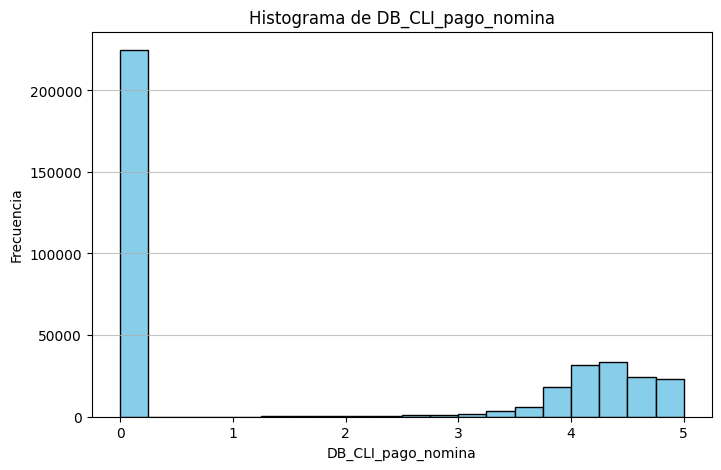

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df_limpio['DB_CLI_pago_nomina'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de DB_CLI_pago_nomina')
plt.xlabel('DB_CLI_pago_nomina')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()


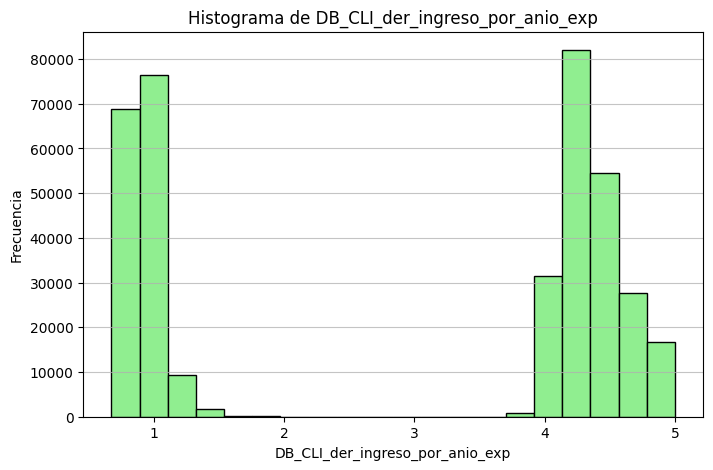

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df_limpio['DB_CLI_der_ingreso_por_anio_exp'].dropna(), 
         bins=20, color='lightgreen', edgecolor='black')
plt.title('Histograma de DB_CLI_der_ingreso_por_anio_exp')
plt.xlabel('DB_CLI_der_ingreso_por_anio_exp')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()


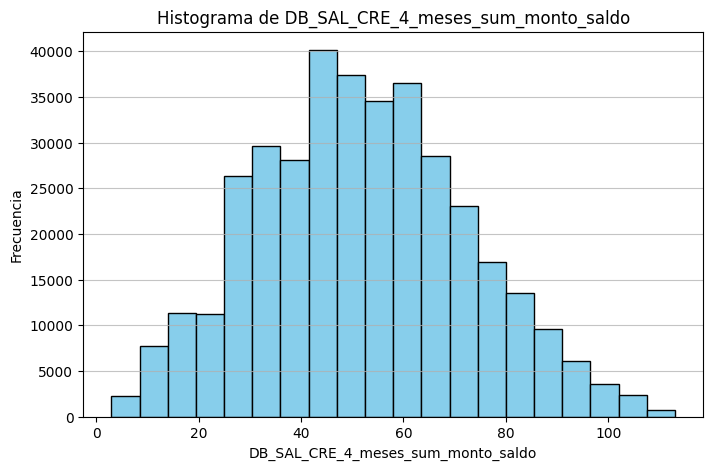

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df_limpio['DB_SAL_CRE_4_meses_sum_monto_saldo'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de DB_SAL_CRE_4_meses_sum_monto_saldo')
plt.xlabel('DB_SAL_CRE_4_meses_sum_monto_saldo')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()


Ejemplo de distribución de variable seleccionada

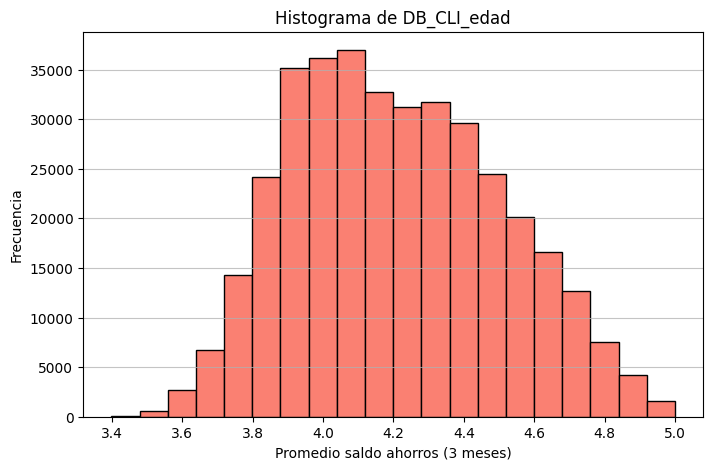

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(df_limpio['DB_CLI_edad'].dropna(), 
         bins=20, color='salmon', edgecolor='black')
plt.title('Histograma de DB_CLI_edad')
plt.xlabel('Promedio saldo ahorros (3 meses)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [76]:
df_limpio['target'].value_counts()

target
0    330313
1     16268
5     13607
3      4756
2      3626
4       918
Name: count, dtype: int64

Agrupar por correlación

In [77]:
import pandas as pd

# === FUNCIÓN PARA AGRUPAR VARIABLES CORRELACIONADAS ===
def agrupar_por_correlacion(df, umbral=0.6):
    """
    Agrupa variables numéricas del DataFrame por correlación >= umbral.
    Retorna:
        - Una lista de sets con columnas correlacionadas.
        - Un set con columnas que no se agruparon (sin correlación suficiente).
    También imprime el progreso de cuántas columnas quedan por evaluar.
    """
    df_corr = df.corr().abs()
    columnas_restantes = set(df_corr.columns)
    grupos = []
    columnas_sin_agrupacion = set()

    while columnas_restantes:
        col = next(iter(columnas_restantes))
        
        # Buscar las columnas correlacionadas dentro de las restantes
        correladas = {c for c in columnas_restantes if df_corr.loc[col, c] >= umbral}
        
        if len(correladas) > 1:
            grupos.append(correladas)
            columnas_restantes -= correladas
            print(f"✅ Nuevo set creado ({len(correladas)} columnas): {correladas}")
            print(f"➡️  Columnas restantes: {len(columnas_restantes)}\n")
        else:
            # Guardar la columna sin agrupación
            columnas_sin_agrupacion.add(col)
            columnas_restantes.remove(col)
            print(f"⚪ Columna sin correlación suficiente: {col}")
            print(f"➡️  Columnas restantes: {len(columnas_restantes)}\n")

    return grupos, columnas_sin_agrupacion


# === APLICACIÓN DIRECTA AL DATAFRAME df_limpio ===
df_numerico = df_limpio.select_dtypes(include='number')
grupos_variables, columnas_sin_agrupacion = agrupar_por_correlacion(df_numerico, umbral=0.6)

# Mostrar resultados finales
print(f"\n🔹 Total de grupos encontrados: {len(grupos_variables)}\n")
for i, grupo in enumerate(grupos_variables, start=1):
    print(f"Set {i}, cantidad columnas: {len(grupo)}: {grupo}")

print(f"\n⚪ Total de columnas sin agrupación: {len(columnas_sin_agrupacion)}")
print(f"Columnas sin agrupación: {columnas_sin_agrupacion}")


⚪ Columna sin correlación suficiente: DB_CONS_cv_transporte
➡️  Columnas restantes: 323

✅ Nuevo set creado (32 columnas): {'DB_CONS_11_meses_prom_compra_salud', 'DB_CONS_11_meses_max_compra_salud', 'DB_CONS_3_meses_max_compra_salud', 'DB_CONS_7_meses_sum_compra_salud', 'DB_CONS_7_meses_prom_compra_salud', 'DB_CONS_7_meses_max_compra_salud', 'DB_CONS_12_meses_max_compra_salud', 'DB_CONS_std_salud', 'DB_CONS_11_meses_sum_compra_salud', 'DB_CONS_10_meses_max_compra_salud', 'DB_CONS_8_meses_sum_compra_salud', 'DB_CONS_6_meses_sum_compra_salud', 'DB_CONS_9_meses_prom_compra_salud', 'DB_CONS_8_meses_prom_compra_salud', 'DB_CONS_12_meses_sum_compra_salud', 'DB_CONS_prop_salud', 'DB_CONS_8_meses_max_compra_salud', 'DB_CONS_4_meses_prom_compra_salud', 'DB_CONS_6_meses_prom_compra_salud', 'DB_CONS_5_meses_sum_compra_salud', 'DB_CONS_4_meses_sum_compra_salud', 'DB_CONS_3_meses_prom_compra_salud', 'DB_CONS_12_meses_prom_compra_salud', 'DB_CONS_9_meses_max_compra_salud', 'DB_CONS_5_meses_prom_comp

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd

target = 'target'  # tu variable objetivo
X_total = df_limpio
y_total = df_limpio[target]

# === SELECCIÓN DE TOP 1 VARIABLE POR AUC DE CADA GRUPO ===
variables_seleccionadas = set()
columnas_sin_agrupacion = set()  # si no estaba definido

for i, grupo in enumerate(grupos_variables, start=1):
    if len(grupo) == 1:
        # Si el grupo tiene solo una variable, no se evalúa, se pasa a sin agrupación
        var_unica = list(grupo)[0]
        columnas_sin_agrupacion.add(var_unica)
        print(f"\n⚪ Grupo {i} tiene una sola variable: {var_unica}, se agrega a sin agrupación")
        continue

    resultados = []
    for var in grupo:
        X = X_total[[var]]
        y = y_total
        try:
            model = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=500, class_weight='balanced'))
            model.fit(X, y)
            y_pred_prob = model.predict_proba(X)
            auc = roc_auc_score(y, y_pred_prob, multi_class='ovr')
            resultados.append((var, auc))
        except Exception as e:
            # Si algo falla, dejamos la variable como sin agrupación
            columnas_sin_agrupacion.add(var)
            print(f"⚠️ Error con variable {var}: {e}. Se agrega a sin agrupación")
            continue

    if resultados:
        resultados_df = pd.DataFrame(resultados, columns=['variable','AUC']).sort_values(by='AUC', ascending=False)
        top1 = resultados_df.iloc[0]['variable']
        variables_seleccionadas.add(top1)
        print(f"\n📌 Grupo {i}: {grupo}")
        print(f"Top 1 variable por AUC: {top1}")


# === COLUMNAS SIN AGRUPACION ===
print(f"\n⚪ Columnas sin agrupación: {columnas_sin_agrupacion}")

# === VARIABLES FINALES SELECCIONADAS ===
print(f"\n✅ Cantidad {len(variables_seleccionadas)} Variables seleccionadas (top 1 de cada grupo): {variables_seleccionadas}")



📌 Grupo 1: {'DB_CONS_11_meses_prom_compra_salud', 'DB_CONS_11_meses_max_compra_salud', 'DB_CONS_3_meses_max_compra_salud', 'DB_CONS_7_meses_sum_compra_salud', 'DB_CONS_7_meses_prom_compra_salud', 'DB_CONS_7_meses_max_compra_salud', 'DB_CONS_12_meses_max_compra_salud', 'DB_CONS_std_salud', 'DB_CONS_11_meses_sum_compra_salud', 'DB_CONS_10_meses_max_compra_salud', 'DB_CONS_8_meses_sum_compra_salud', 'DB_CONS_6_meses_sum_compra_salud', 'DB_CONS_9_meses_prom_compra_salud', 'DB_CONS_8_meses_prom_compra_salud', 'DB_CONS_12_meses_sum_compra_salud', 'DB_CONS_prop_salud', 'DB_CONS_8_meses_max_compra_salud', 'DB_CONS_4_meses_prom_compra_salud', 'DB_CONS_6_meses_prom_compra_salud', 'DB_CONS_5_meses_sum_compra_salud', 'DB_CONS_4_meses_sum_compra_salud', 'DB_CONS_3_meses_prom_compra_salud', 'DB_CONS_12_meses_prom_compra_salud', 'DB_CONS_9_meses_max_compra_salud', 'DB_CONS_5_meses_prom_compra_salud', 'DB_CONS_10_meses_sum_compra_salud', 'DB_CONS_9_meses_sum_compra_salud', 'DB_CONS_5_meses_max_compra

In [79]:
df_limpio['target'].value_counts()

target
0    330313
1     16268
5     13607
3      4756
2      3626
4       918
Name: count, dtype: int64

In [80]:
variables_seleccionadas

{'DB_CLI_der_ingreso_edad_exp',
 'DB_CLI_der_ingreso_vs_nomina',
 'DB_CLI_ingreso',
 'DB_CLI_num_ofertas',
 'DB_CLI_num_productos',
 'DB_CLI_relacion_ofertas_uso',
 'DB_CONS_10_meses_max_compra_restaurante',
 'DB_CONS_10_meses_max_compra_supermercado',
 'DB_CONS_10_meses_max_compra_transporte',
 'DB_CONS_12_meses_max_compra_salud',
 'DB_CONS_2_meses_max_compra_restaurante',
 'DB_CONS_2_meses_min_compra_restaurante',
 'DB_CONS_2_meses_min_compra_transporte',
 'DB_CONS_2_meses_sum_compra_salud',
 'DB_CONS_4_meses_prom_compra_supermercado',
 'DB_CONS_5_meses_prom_compra_supermercado',
 'DB_CONS_6_meses_min_compra_supermercado',
 'DB_CONS_6_meses_sum_compra_supermercado',
 'DB_CONS_7_meses_min_compra_transporte',
 'DB_CONS_total_gasto',
 'DB_SAL_CRE_12_meses_sum_monto_saldo',
 'DB_SAL_CRE_2_meses_prom_monto_saldo',
 'DB_SAL_CRE_6_meses_min_monto_saldo',
 'DB_SAL_CRE_diff_dias_atraso',
 'DB_SAL_CRE_diff_monto_saldo',
 'DB_SAL_CRE_mean_dias_atraso',
 'DB_SAL_CRE_n_inst_fin',
 'DB_SAL_CRE_n_t

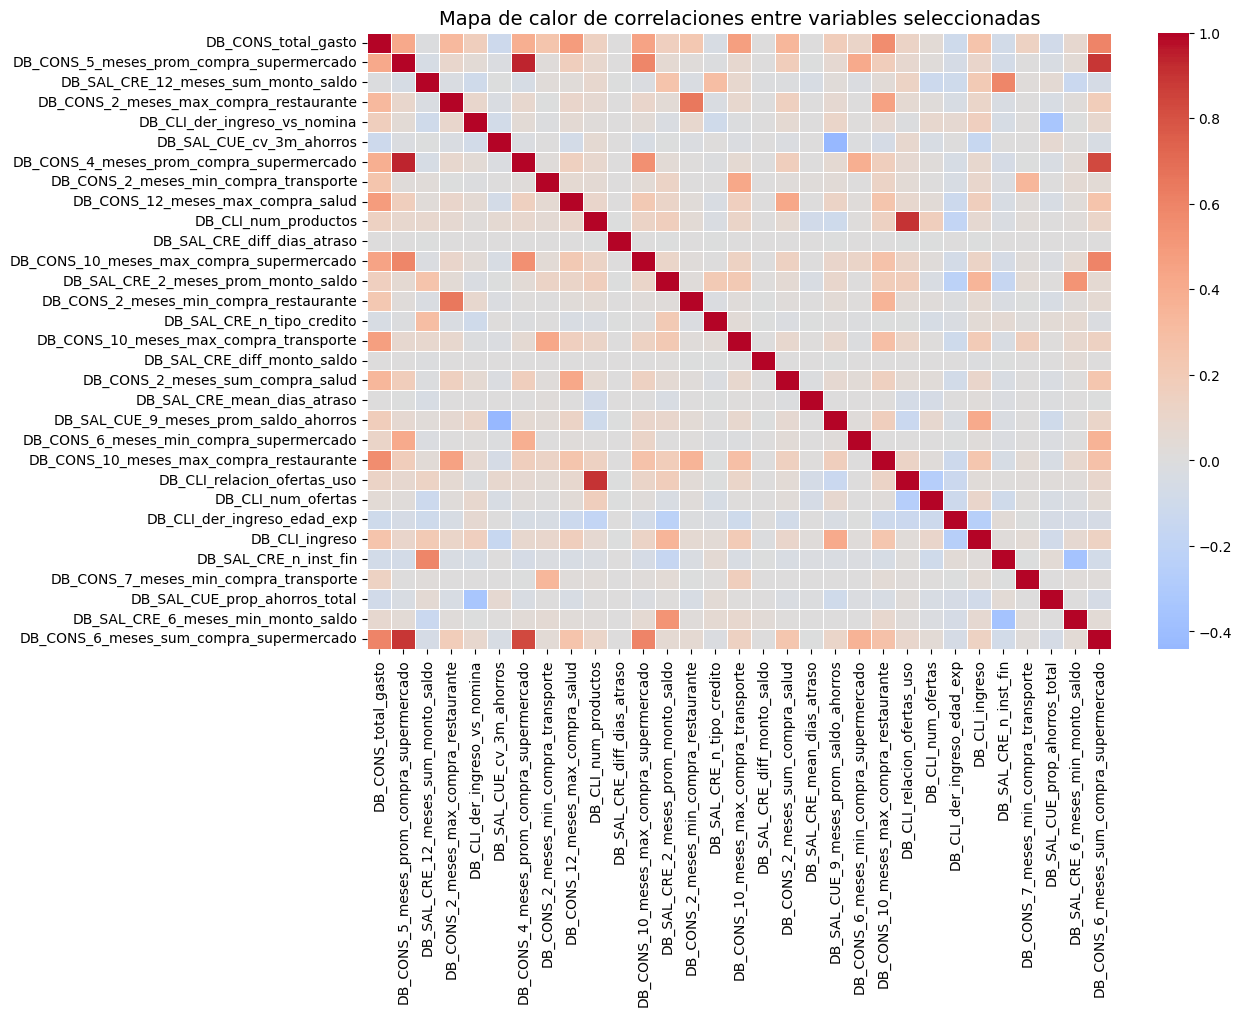

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes tu DataFrame principal
# df_limpio = ...  # DataFrame con todas las variables

# Lista de variables seleccionadas
features = list(variables_seleccionadas)

# Subconjunto del DataFrame solo con esas variables
df_subset = df_limpio[features]

# Calcular la matriz de correlación
corr_matrix = df_subset.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Dibujar el heatmap
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=False,   # pon True si quieres mostrar los valores
    center=0,
    linewidths=0.5
)

plt.title("Mapa de calor de correlaciones entre variables seleccionadas", fontsize=14)
plt.show()


In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# === VARIABLES SELECCIONADAS (TOP 1 DE CADA GRUPO) ===
features = list(variables_seleccionadas)  # Convertimos el set a lista

# Separar X e y
X = df_limpio[features]
y = df_limpio['target']

# Dividir en train (70%) y temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Dividir temp en validation (20%) y test (10%)
# Nota: validation = 20/30 = 2/3 del temp, test = 1/3 del temp
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp
)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

# Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Evaluar en validation
y_val_pred = rf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Evaluar en test
y_test_pred = rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Train: (258641, 31), Validation: (73898, 31), Test: (36949, 31)
Validation Accuracy: 0.9937616714931392
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     66063
           1       1.00      0.93      0.96      3253
           2       1.00      0.93      0.97       725
           3       1.00      0.94      0.97       952
           4       1.00      0.95      0.97       184
           5       1.00      0.96      0.98      2721

    accuracy                           0.99     73898
   macro avg       1.00      0.95      0.97     73898
weighted avg       0.99      0.99      0.99     73898

Test Accuracy: 0.9938022679910147
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     33032
           1       1.00      0.93      0.96      1627
           2       1.00      0.94      0.97       363
           3       1.00      0.93      0.96       475
           4       1.00      0.97      0.98     

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# === VARIABLES SELECCIONADAS (TOP 5) ===
features = [
    'DB_CLI_num_productos',
    'DB_CLI_ingreso',
]

# Separar X e y
X = df_limpio[features]
y = df_limpio['target']

# Dividir en train (70%) y temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Dividir temp en validation (20%) y test (10%)
# Nota: validation = 20/30 = 2/3 del temp, test = 1/3 del temp
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=1/3, random_state=42, stratify=y_temp
)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")

# Entrenar Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# Evaluar en validation
y_val_pred = rf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Evaluar en test
y_test_pred = rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Train: (258641, 2), Validation: (73898, 2), Test: (36949, 2)
Validation Accuracy: 0.8082221440363745
              precision    recall  f1-score   support

           0       0.99      0.80      0.88     66063
           1       0.46      0.89      0.60      3253
           2       0.26      0.90      0.40       725
           3       0.27      0.89      0.42       952
           4       0.14      0.95      0.24       184
           5       0.32      0.89      0.47      2721

    accuracy                           0.81     73898
   macro avg       0.41      0.89      0.50     73898
weighted avg       0.93      0.81      0.84     73898

Test Accuracy: 0.8072478280873636
              precision    recall  f1-score   support

           0       0.99      0.80      0.88     33032
           1       0.45      0.89      0.60      1627
           2       0.26      0.93      0.40       363
           3       0.27      0.89      0.42       475
           4       0.14      0.95      0.24        

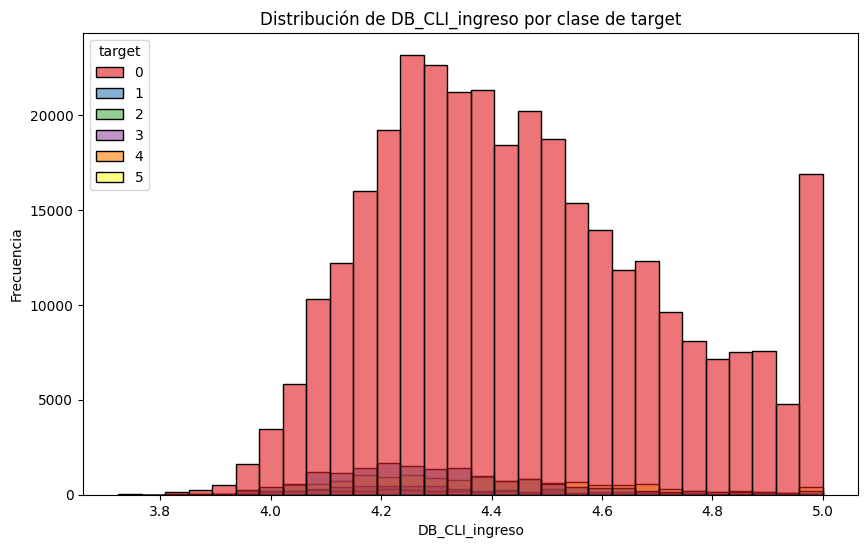

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la variable por clase del target
plt.figure(figsize=(10,6))
sns.histplot(
    data=df_limpio, 
    x='DB_CLI_ingreso', 
    hue='target',        # Diferencia por clase
    bins=30,             # Número de bins
    kde=False,           # Si quieres la curva de densidad, poner True
    palette='Set1',      # Colores diferentes por clase
    alpha=0.6            # Transparencia para ver overlapping
)
plt.title('Distribución de DB_CLI_ingreso por clase de target')
plt.xlabel('DB_CLI_ingreso')
plt.ylabel('Frecuencia')
plt.show()



Top variables más importantes:
                                Variable  Importancia
1  DB_SAL_CUE_9_meses_prom_saldo_ahorros     0.258604
3                         DB_CLI_ingreso     0.257758
4    DB_SAL_CRE_12_meses_sum_monto_saldo     0.242932
2          DB_SAL_CUE_prop_ahorros_total     0.139415
0                   DB_CLI_num_productos     0.101291


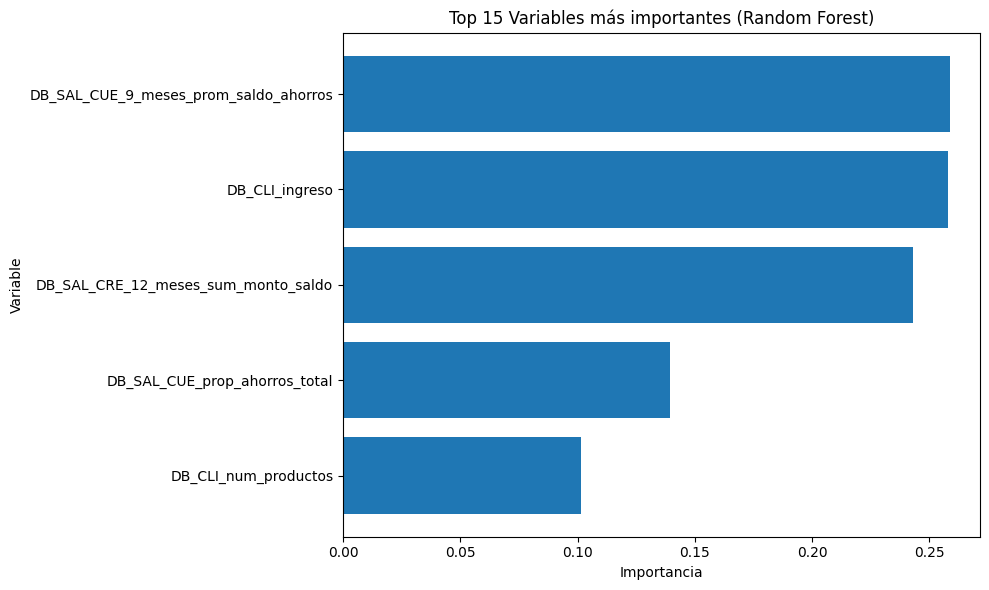

In [85]:
# === FEATURE IMPORTANCE ===
importancia = pd.DataFrame({
    'Variable': features,
    'Importancia': rf.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("\nTop variables más importantes:")
print(importancia.head(15))

# === Visualización ===
plt.figure(figsize=(10, 6))
plt.barh(importancia['Variable'][:15][::-1], importancia['Importancia'][:15][::-1])
plt.title('Top 15 Variables más importantes (Random Forest)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

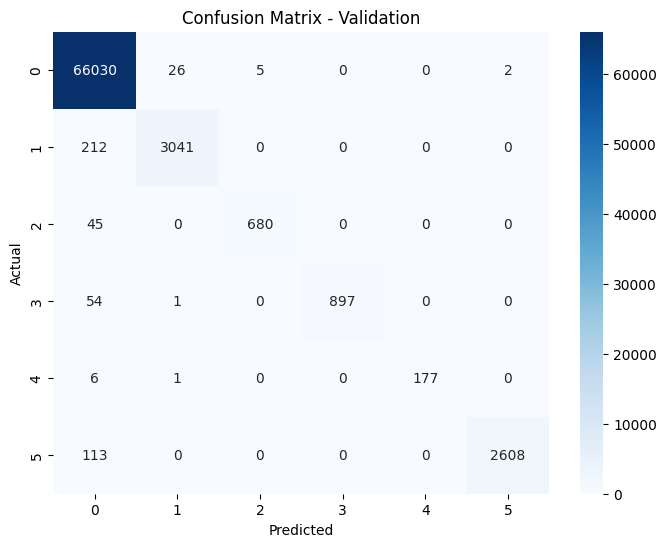

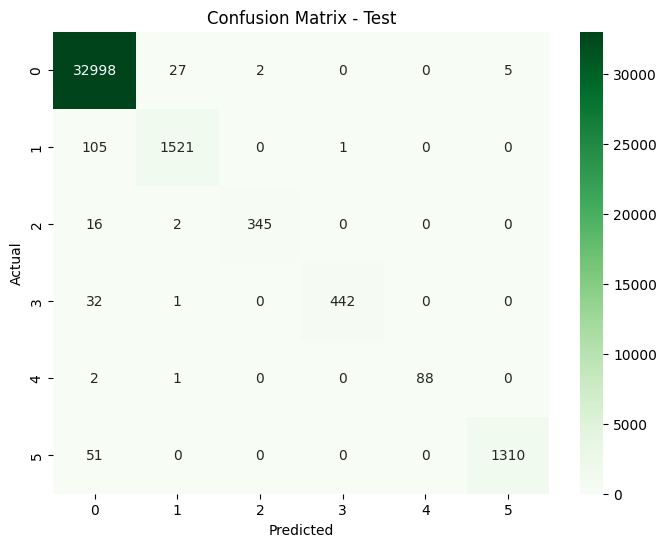

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Matriz de confusión para validation
cm_val = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Validation')
plt.show()

# Matriz de confusión para test
cm_test = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test')
plt.show()


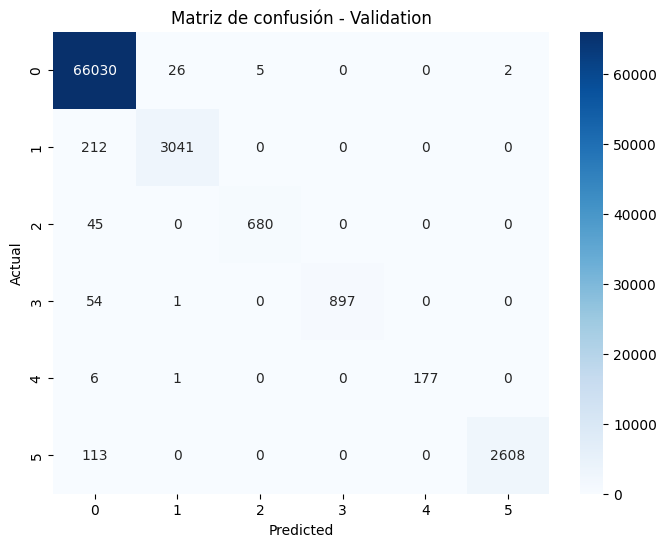

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Matriz de confusión
cm_val = confusion_matrix(y_val, y_val_pred)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(y.unique()), 
            yticklabels=sorted(y.unique()))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de confusión - Validation')
plt.show()


In [88]:
fjdlkjfdskljflkdsjflkds

NameError: name 'fjdlkjfdskljflkdsjflkds' is not defined